# Predict Customer Clicked Ads Classification By Using Machine Learning

### **Import Libraries and Settings**

In [114]:
# Import initial necessary libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Settings of dataframe display
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = None

# Version requirements
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.1
seaborn version :  0.13.2


## Load Dataset

In [115]:
df = pd.read_csv('Clicked Ads Dataset.csv')

In [116]:
df.sample(10)

Unnamed: 0  Daily Time Spent on Site  Age  Area Income  \
134         134                     43.49   47  352348220.0   
549         549                     73.89   35  493469480.0   
723         723                     48.22   40  517180370.0   
136         136                     38.37   36  288604120.0   
403         403                     87.23   29  357105770.0   
850         850                     78.58   33  362408060.0   
791         791                     35.49   47  258189610.0   
28           28                     70.20   34  228962580.0   
329         329                     41.47   31  426677510.0   
500         500                     51.56   46  441715330.0   

     Daily Internet Usage       Male        Timestamp Clicked on Ad  \
134                127.83  Perempuan  1/12/2016 10:07           Yes   
549                229.99  Laki-Laki  6/26/2016 17:25            No   
723                214.33  Perempuan  3/22/2016 19:14            No   
136                140.46  Perempuan   5/13/2016 6:09           Yes   
403                202.12  Perempuan  3/26/2016 19:54            No   
850                250.11  Laki-Laki  4/16/2016 10:36            No   
791                170.04  Perempuan   4/13/2016 7:07           Yes   
28                 119.20  Perempuan   4/14/2016 5:08           Yes   
329                219.79  Perempuan   7/6/2016 15:56           Yes   
500                124.85  Perempuan   1/7/2016 13:58           Yes   

                  city                       province    category  
134             Bekasi                     Jawa Barat      Travel  
549      Jakarta Barat  Daerah Khusus Ibukota Jakarta     Fashion  
723           Surabaya                     Jawa Timur        Food  
136      Jakarta Timur  Daerah Khusus Ibukota Jakarta     Finance  
403          Palembang                Sumatra Selatan    Otomotif  
850           Makassar               Sulawesi Selatan  Electronic  
791            Bandung                     Jawa Barat    Otomotif  
28           Pontianak               Kalimantan Barat       House  
329    Jakarta Selatan  Daerah Khusus Ibukota Jakarta     Fashion  
500  Tangerang Selatan                         Banten        Bank

In [117]:
# Dataframe shape
df.shape

(1000, 11)

The original dataframe has 1000 rows and 11 columns.

## Initial Transformation

In [118]:
# Drop index column
df.drop(columns='Unnamed: 0', inplace=True)

# Rename column name for and maintain column name similarity
df.rename(columns={'Male': 'Gender',
                   'Timestamp': 'Visit Time',
                   'city' : 'City',
                   'province' : 'Province',
                   'category' : 'Category'}, inplace=True)

# Re-arrange column (target 'Clicked on Ad' at the end --> personal preference)
df_1 = df.drop(columns='Clicked on Ad')
df_2 = df['Clicked on Ad']
df = pd.concat([df_1, df_2], axis='columns')

# Other way to re-arrange column
# df = df[[col for col in df if col != 'Clicked on Ad'] + ['Clicked on Ad']]

In [119]:
df.sample(10)

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
647                     46.43   28  377457010.0                137.20   
297                     72.07   31  487973570.0                226.45   
499                     58.35   37  491630650.0                132.63   
737                     71.23   52  290648960.0                122.59   
522                     79.16   32  486937220.0                202.90   
377                     69.20   42  182167930.0                123.80   
278                     81.37   26  371346080.0                156.48   
385                     80.59   37  474211920.0                224.23   
286                     56.01   26  324374750.0                127.26   
764                     52.84   51  270488400.0                121.57   

        Gender       Visit Time           City                       Province  \
647  Laki-Laki   4/25/2016 3:18    Banjarmasin             Kalimantan Selatan   
297  Perempuan  4/16/2016 16:38          Medan                  Sumatra Utara   
499  Perempuan  6/12/2016 21:21        Bandung                     Jawa Barat   
737  Perempuan   1/5/2016 11:53          Bogor                     Jawa Barat   
522  Laki-Laki  3/30/2016 20:23         Padang                  Sumatra Barat   
377  Perempuan   6/17/2016 9:58          Batam                 Kepulauan Riau   
278  Laki-Laki  2/15/2016 12:25       Makassar               Sulawesi Selatan   
385  Perempuan  7/21/2016 23:14       Surabaya                     Jawa Timur   
286  Perempuan   7/5/2016 18:59  Jakarta Timur  Daerah Khusus Ibukota Jakarta   
764  Laki-Laki  6/29/2016 10:50          Batam                 Kepulauan Riau   

      Category Clicked on Ad  
647  Furniture           Yes  
297  Furniture            No  
499       Food           Yes  
737      House           Yes  
522   Otomotif            No  
377     Travel           Yes  
278     Health            No  
385       Bank            No  
286     Health           Yes  
764     Travel           Yes

In [120]:
# Dataframe informations
desc_col = []

for col in df.columns :
    desc_col.append([col, df[col].dtype, df[col].isna().sum(), round(df[col].isna().sum()/len(df) * 100, 2), df.duplicated().sum(), df[col].nunique(), df[col].unique()[:5]])

desc_df = pd.DataFrame(data=desc_col, columns='Feature, Data Type, Null Values, Null Percentage (%), Duplicated Values, Unique Values, 5 Unique Sample'.split(","))
desc_df

Feature  Data Type   Null Values   Null Percentage (%)  \
0  Daily Time Spent on Site    float64            13                   1.3   
1                       Age      int64             0                   0.0   
2               Area Income    float64            13                   1.3   
3      Daily Internet Usage    float64            11                   1.1   
4                    Gender     object             3                   0.3   
5                Visit Time     object             0                   0.0   
6                      City     object             0                   0.0   
7                  Province     object             0                   0.0   
8                  Category     object             0                   0.0   
9             Clicked on Ad     object             0                   0.0   

    Duplicated Values   Unique Values  \
0                   0             890   
1                   0              43   
2                   0             987   
3                   0             955   
4                   0               2   
5                   0             997   
6                   0              30   
7                   0              16   
8                   0              10   
9                   0               2   

                                                                    5 Unique Sample  
0                                               [68.95, 80.23, 69.47, 74.15, 68.37]  
1                                                              [35, 31, 26, 29, 23]  
2   [432837300.0, 479092950.00000006, 418501580.0, 383643260.0, 517229930.00000006]  
3                                           [256.09, 193.77, 236.5, 245.89, 225.58]  
4                                                       [Perempuan, Laki-Laki, nan]  
5   [3/27/2016 0:53, 4/4/2016 1:39, 3/13/2016 20:35, 1/10/2016 2:31, 6/3/2016 3:36]  
6                                 [Jakarta Timur, Denpasar, Surabaya, Batam, Medan]  
7  [Daerah Khusus Ibukota Jakarta, Bali, Jawa Timur, Kepulauan Riau, Sumatra Utara]  
8                                     [Furniture, Food, Electronic, House, Finance]  
9                                                                         [No, Yes]

**Feature Descriptions**

- `Daily Time Spent on Site`: Time spent on the site (Minutes)
- `Age`: Age of the customer
- `Area Income`: The total income of customer in an area
- `Daily Internet Usage`: Time spent on the internet (Minutes)
- `Gender`: Gender of the customer
- `Visit Time`: Time the customer visit on the website
- `City`: City of customer's residence
- `Province`: Province of customer's residence
- `Category`: Product category
- `Clicked on Ad`: Whether the customer clicked the ad or not

In [121]:
# Grouping columns based on data types
nums_cols = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

cats_cols = ['Gender', 'City', 'Province', 'Category', 'Clicked on Ad']

date_cols = ['Visit Time']

- Categorical columns (10 columns): 
    - `Gender` : nominal
    - `City` : nominal
    - `Province` : nominal
    - `Category` : nominal
    -  `Clicked on Ad` : nominal (Binary 0 & 1)

- Numerical/Continuous columns (18 columns) :

    - `Daily Time Spent on Site, Age, Area Income, Daily Internet Usage`

- Date column (1 column) :
    -  `Visit Time`

In [122]:
# Data type correction for Visit Time
df['Visit Time'] = pd.to_datetime(df['Visit Time'])

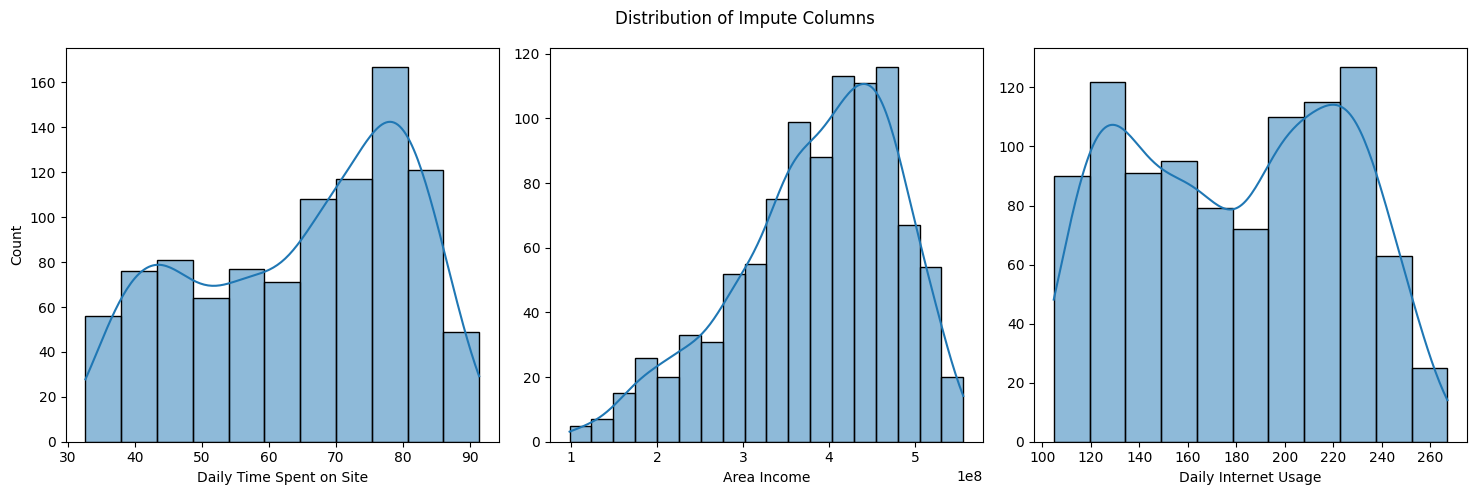

In [123]:
# Checking distribution in columns with missing value for proper imputation method
impute_col = ['Daily Time Spent on Site', 'Area Income', 'Daily Internet Usage']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot histograms for each column
for i, col in enumerate(impute_col):
    sns.histplot(data=df, x=col, kde=True, ax=ax[i])
    if i != 0:
        ax[i].set_ylabel(None)

plt.suptitle('Distribution of Impute Columns')
plt.tight_layout()
plt.show()

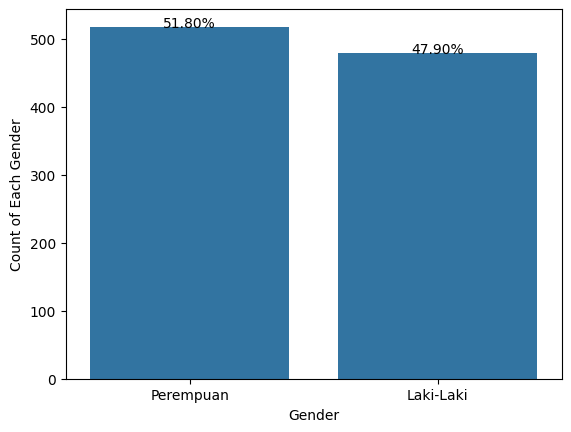

In [124]:
ax = sns.countplot(data=df, x='Gender')

# Calculate the percentage for each category
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1,
            '{:.2f}%'.format((height / total
                              ) * 100),
            ha="center")
plt.ylabel('Count of Each Gender')
plt.show()

> Imputation method based on distribution :

- Daily Time Spent on Site and Daily Internet Usage : mean
- Area Income : median
- Gender : mode

In [125]:
# Impute missing values
df['Daily Time Spent on Site'] = df['Daily Time Spent on Site'].fillna(df['Daily Time Spent on Site'].mean())
df['Daily Internet Usage'] = df['Daily Internet Usage'].fillna(df['Daily Internet Usage'].mean())
df['Area Income'] = df['Area Income'].fillna(df['Area Income'].median())
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

# **STAGE 1 : EXPLORATORY DATA ANALYSIS (EDA)**

## Statistical Summary

In [126]:
# Numerical columns
nums_summary = df[nums_cols].describe().transpose()
nums_summary['range'] = nums_summary['max'] - nums_summary['min']
nums_summary['coefficient of variation'] = nums_summary['std'] / nums_summary['mean']

nums_summary

count          mean           std          min  \
Daily Time Spent on Site  1000.0  6.492952e+01  1.574127e+01        32.60   
Age                       1000.0  3.600900e+01  8.785562e+00        19.00   
Area Income               1000.0  3.850493e+08  9.347971e+07  97975500.00   
Daily Internet Usage      1000.0  1.798636e+02  4.362795e+01       104.78   

                                   25%           50%           75%  \
Daily Time Spent on Site  5.154500e+01  6.778000e+01  7.835250e+01   
Age                       2.900000e+01  3.500000e+01  4.200000e+01   
Area Income               3.298201e+08  3.990683e+08  4.566932e+08   
Daily Internet Usage      1.390175e+02  1.810650e+02  2.182875e+02   

                                   max         range  coefficient of variation  
Daily Time Spent on Site  9.143000e+01  5.883000e+01                  0.242436  
Age                       6.100000e+01  4.200000e+01                  0.243982  
Area Income               5.563936e+08  4.584181e+08                  0.242773  
Daily Internet Usage      2.670100e+02  1.622300e+02                  0.242561

In [127]:
# Categorical columns
cats_summary = df[cats_cols].describe().transpose()

cats_summary['bottom'] = [df[col].value_counts().idxmin() for col in cats_cols]
cats_summary['freq_bottom'] = [df[col].value_counts().min() for col in cats_cols]

cats_summary

count unique                            top freq  \
Gender         1000      2                      Perempuan  521   
City           1000     30                       Surabaya   64   
Province       1000     16  Daerah Khusus Ibukota Jakarta  253   
Category       1000     10                       Otomotif  112   
Clicked on Ad  1000      2                             No  500   

                         bottom  freq_bottom  
Gender                Laki-Laki          479  
City                     Serang           11  
Province       Kalimantan Barat           12  
Category                   Bank           90  
Clicked on Ad                No          500

In [128]:
# Date columns
df[date_cols].describe().transpose()

dates_summary = df[date_cols].describe().transpose()
dates_summary['date_data_range'] = dates_summary['max'] - dates_summary['min']

dates_summary

count                        mean                  min  \
Visit Time  1000  2016-04-10 10:33:36.840000  2016-01-01 02:52:00   

                            25%                  50%                  75%  \
Visit Time  2016-02-18 02:55:15  2016-04-07 17:27:00  2016-05-31 03:18:00   

                            max    date_data_range  
Visit Time  2016-07-24 00:22:00  204 days 21:30:00

The data extracted for analysis are only around 6 months, nearly 7.

## Univariate Analysis

### Numerical

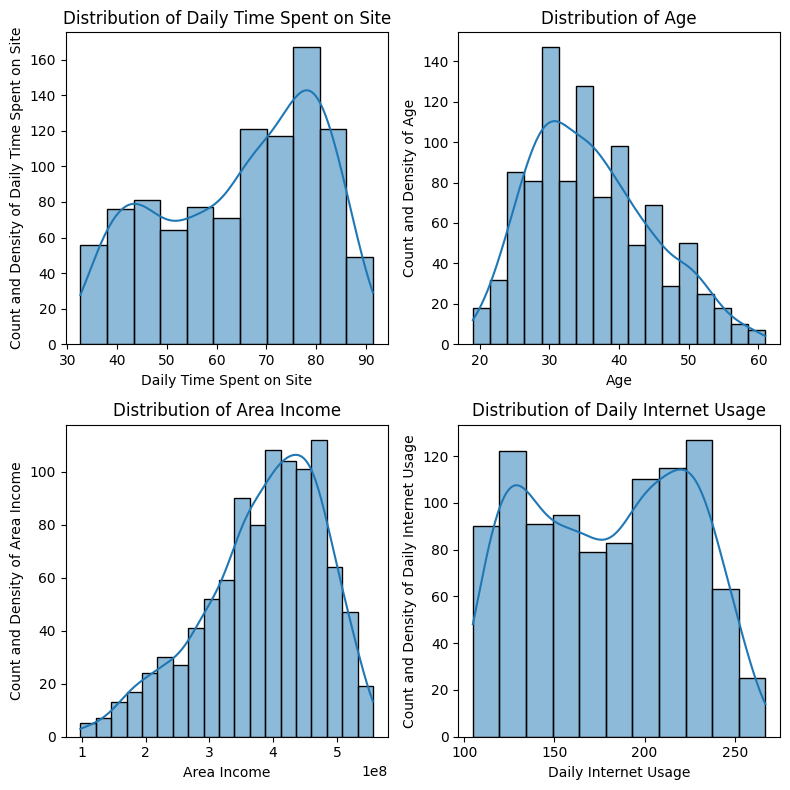

In [129]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
ax = ax.flatten()

for i, col in enumerate(nums_cols) :
    sns.histplot(data=df, x=col, ax=ax[i], kde=True)
    ax[i].set_title(f'Distribution of {col}')
    ax[i].set_ylabel(f'Count and Density of {col}')
    ax[i].set_xlabel(f'{col}')

plt.tight_layout()
plt.show()

In [130]:
# Distribution categorization
from scipy.stats import skew
from scipy.stats import kurtosis

skew_type_list = []
skew_val_list = []
kurtosis_val_list = []

for column in nums_cols :
    data = df[column]
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)

    mean = round(data.mean(), 3)
    median = data.median()
    mode = data.mode()[0]

    skew_val = round(skew(data, nan_policy="omit"),3)
    kurtosis_val = round(kurtosis(data, nan_policy="omit"),3)

    # Distribution conditions for normal and skewed
    if (mean == median == mode) or (-0.2 < skew_val < 0.2):
        skew_type = "Normal Distribution (Symmetric)"
    elif mean < median < mode:
        skew_type = "Negatively Skewed"
        if skew_val <= -1:
            skew_type = "Highly Negatively Skewed"
        elif -0.5 >= skew_val > -1:
            skew_type = "Moderately Negatively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"
    else:
        skew_type = "Positively Skewed"
        if skew_val >= 1:
            skew_type = "Highly Positively Skewed"
        elif 0.5 <= skew_val < 1:
            skew_type = "Moderately Positively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"

    skew_type_list.append(skew_type)
    skew_val_list.append(skew_val)
    kurtosis_val_list.append(kurtosis_val)
            
dist = pd.DataFrame({
    "Column Name":nums_cols,
    "Skewness": skew_val_list,
    "Kurtosis": kurtosis_val_list,
    "Type of Distribution": skew_type_list
})

# Distribution conditions for uniform and bimodal
dist.loc[dist['Column Name'].isin(['Daily Internet Usage', 'Daily Time Spent on Site']), 'Type of Distribution'] = 'Uniform Distribution'
dist.loc[dist['Column Name'].isin(['Column Name']), 'Type of Distribution'] = 'Bimodal Distribution'

dist

Column Name  Skewness  Kurtosis  \
0  Daily Time Spent on Site    -0.372    -1.074   
1                       Age     0.478    -0.405   
2               Area Income    -0.653    -0.079   
3      Daily Internet Usage    -0.032    -1.258   

                         Type of Distribution  
0                        Uniform Distribution  
1  Moderately Normal Distribution (Symmetric)  
2  Moderately Normal Distribution (Symmetric)  
3                        Uniform Distribution

Distribution types of each numerical column can be seen in above dataframe, that is almost all of them are categorized as normal distribution. 

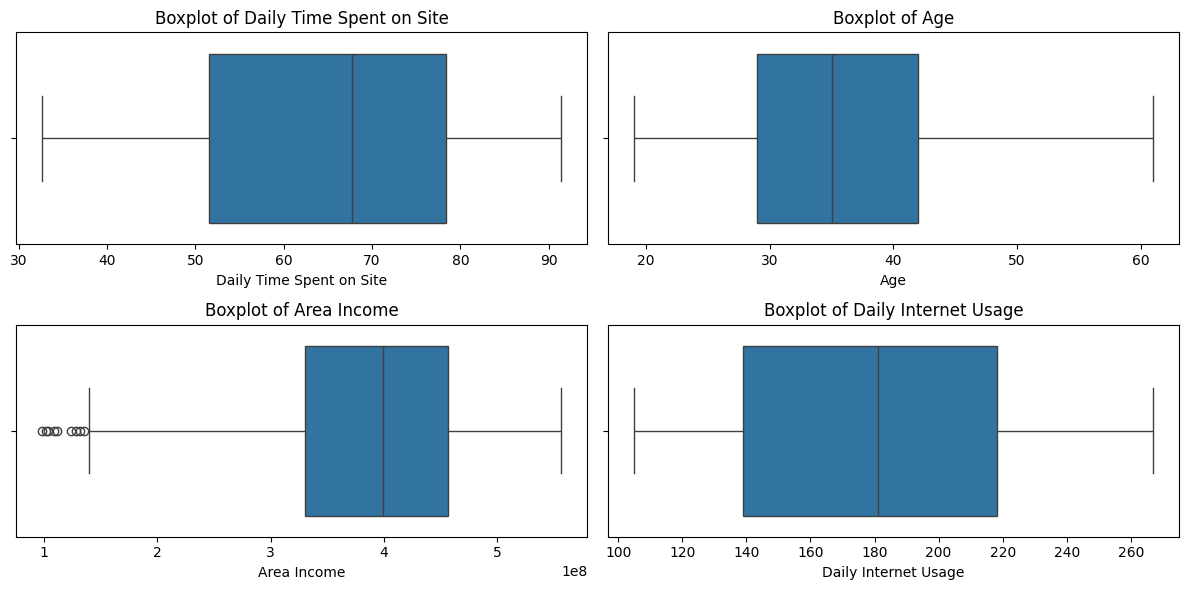

In [131]:
# Boxplot
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
ax = ax.flatten()

for i, col in enumerate(nums_cols) :
    sns.boxplot(data=df, ax=ax[i], x=col)
    ax[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [132]:
# Outlier detection for original data
print(f'Amount of Rows: {len(df)}')

outlier = []
no_outlier = []
is_outlier = []
low_bound = []
high_bound = []

filtered_entries = np.array([True] * len(df))

for col in nums_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)

    filter_outlier = ((df[col] >= lower_bound) & (df[col] <= upper_bound))

    outlier.append(len(df[~filter_outlier]))
    no_outlier.append(len(df[filter_outlier]))
    is_outlier.append(df[col][~filter_outlier].any())
    low_bound.append(lower_bound)
    high_bound.append(upper_bound)

    filtered_entries = ((df[col] >= lower_bound) & (df[col] <= upper_bound)) & filtered_entries

print(f'Amount of Outlier Rows : {len(df[~filtered_entries])}')
print(f'Amount of Non-Outlier Rows : {len(df[filtered_entries])}')
print(f'Percentage of Outliers : {round(len(df[~filtered_entries]) / len(df) * 100, 2)}')
print()

percentage_outlier = np.array(outlier) / len(df) * 100
check_outliers = pd.DataFrame({
    'Column Name':nums_cols,
    'Outlier Exist': is_outlier,
    'Lower Limit': low_bound,
    'Upper Limit': high_bound,
    'Outlier Data': outlier,
    'Non-Outlier Data': no_outlier,
    'Percentage of Outlier': percentage_outlier
})

check_outliers

Amount of Rows: 1000
Amount of Outlier Rows : 9
Amount of Non-Outlier Rows : 991
Percentage of Outliers : 0.9



Column Name  Outlier Exist   Lower Limit   Upper Limit  \
0  Daily Time Spent on Site          False  1.133375e+01  1.185637e+02   
1                       Age          False  9.500000e+00  6.150000e+01   
2               Area Income           True  1.395105e+08  6.470028e+08   
3      Daily Internet Usage          False  2.011250e+01  3.371925e+02   

   Outlier Data  Non-Outlier Data  Percentage of Outlier  
0             0              1000                    0.0  
1             0              1000                    0.0  
2             9               991                    0.9  
3             0              1000                    0.0

### Categorical

In [133]:
cats_cols

['Gender', 'City', 'Province', 'Category', 'Clicked on Ad']

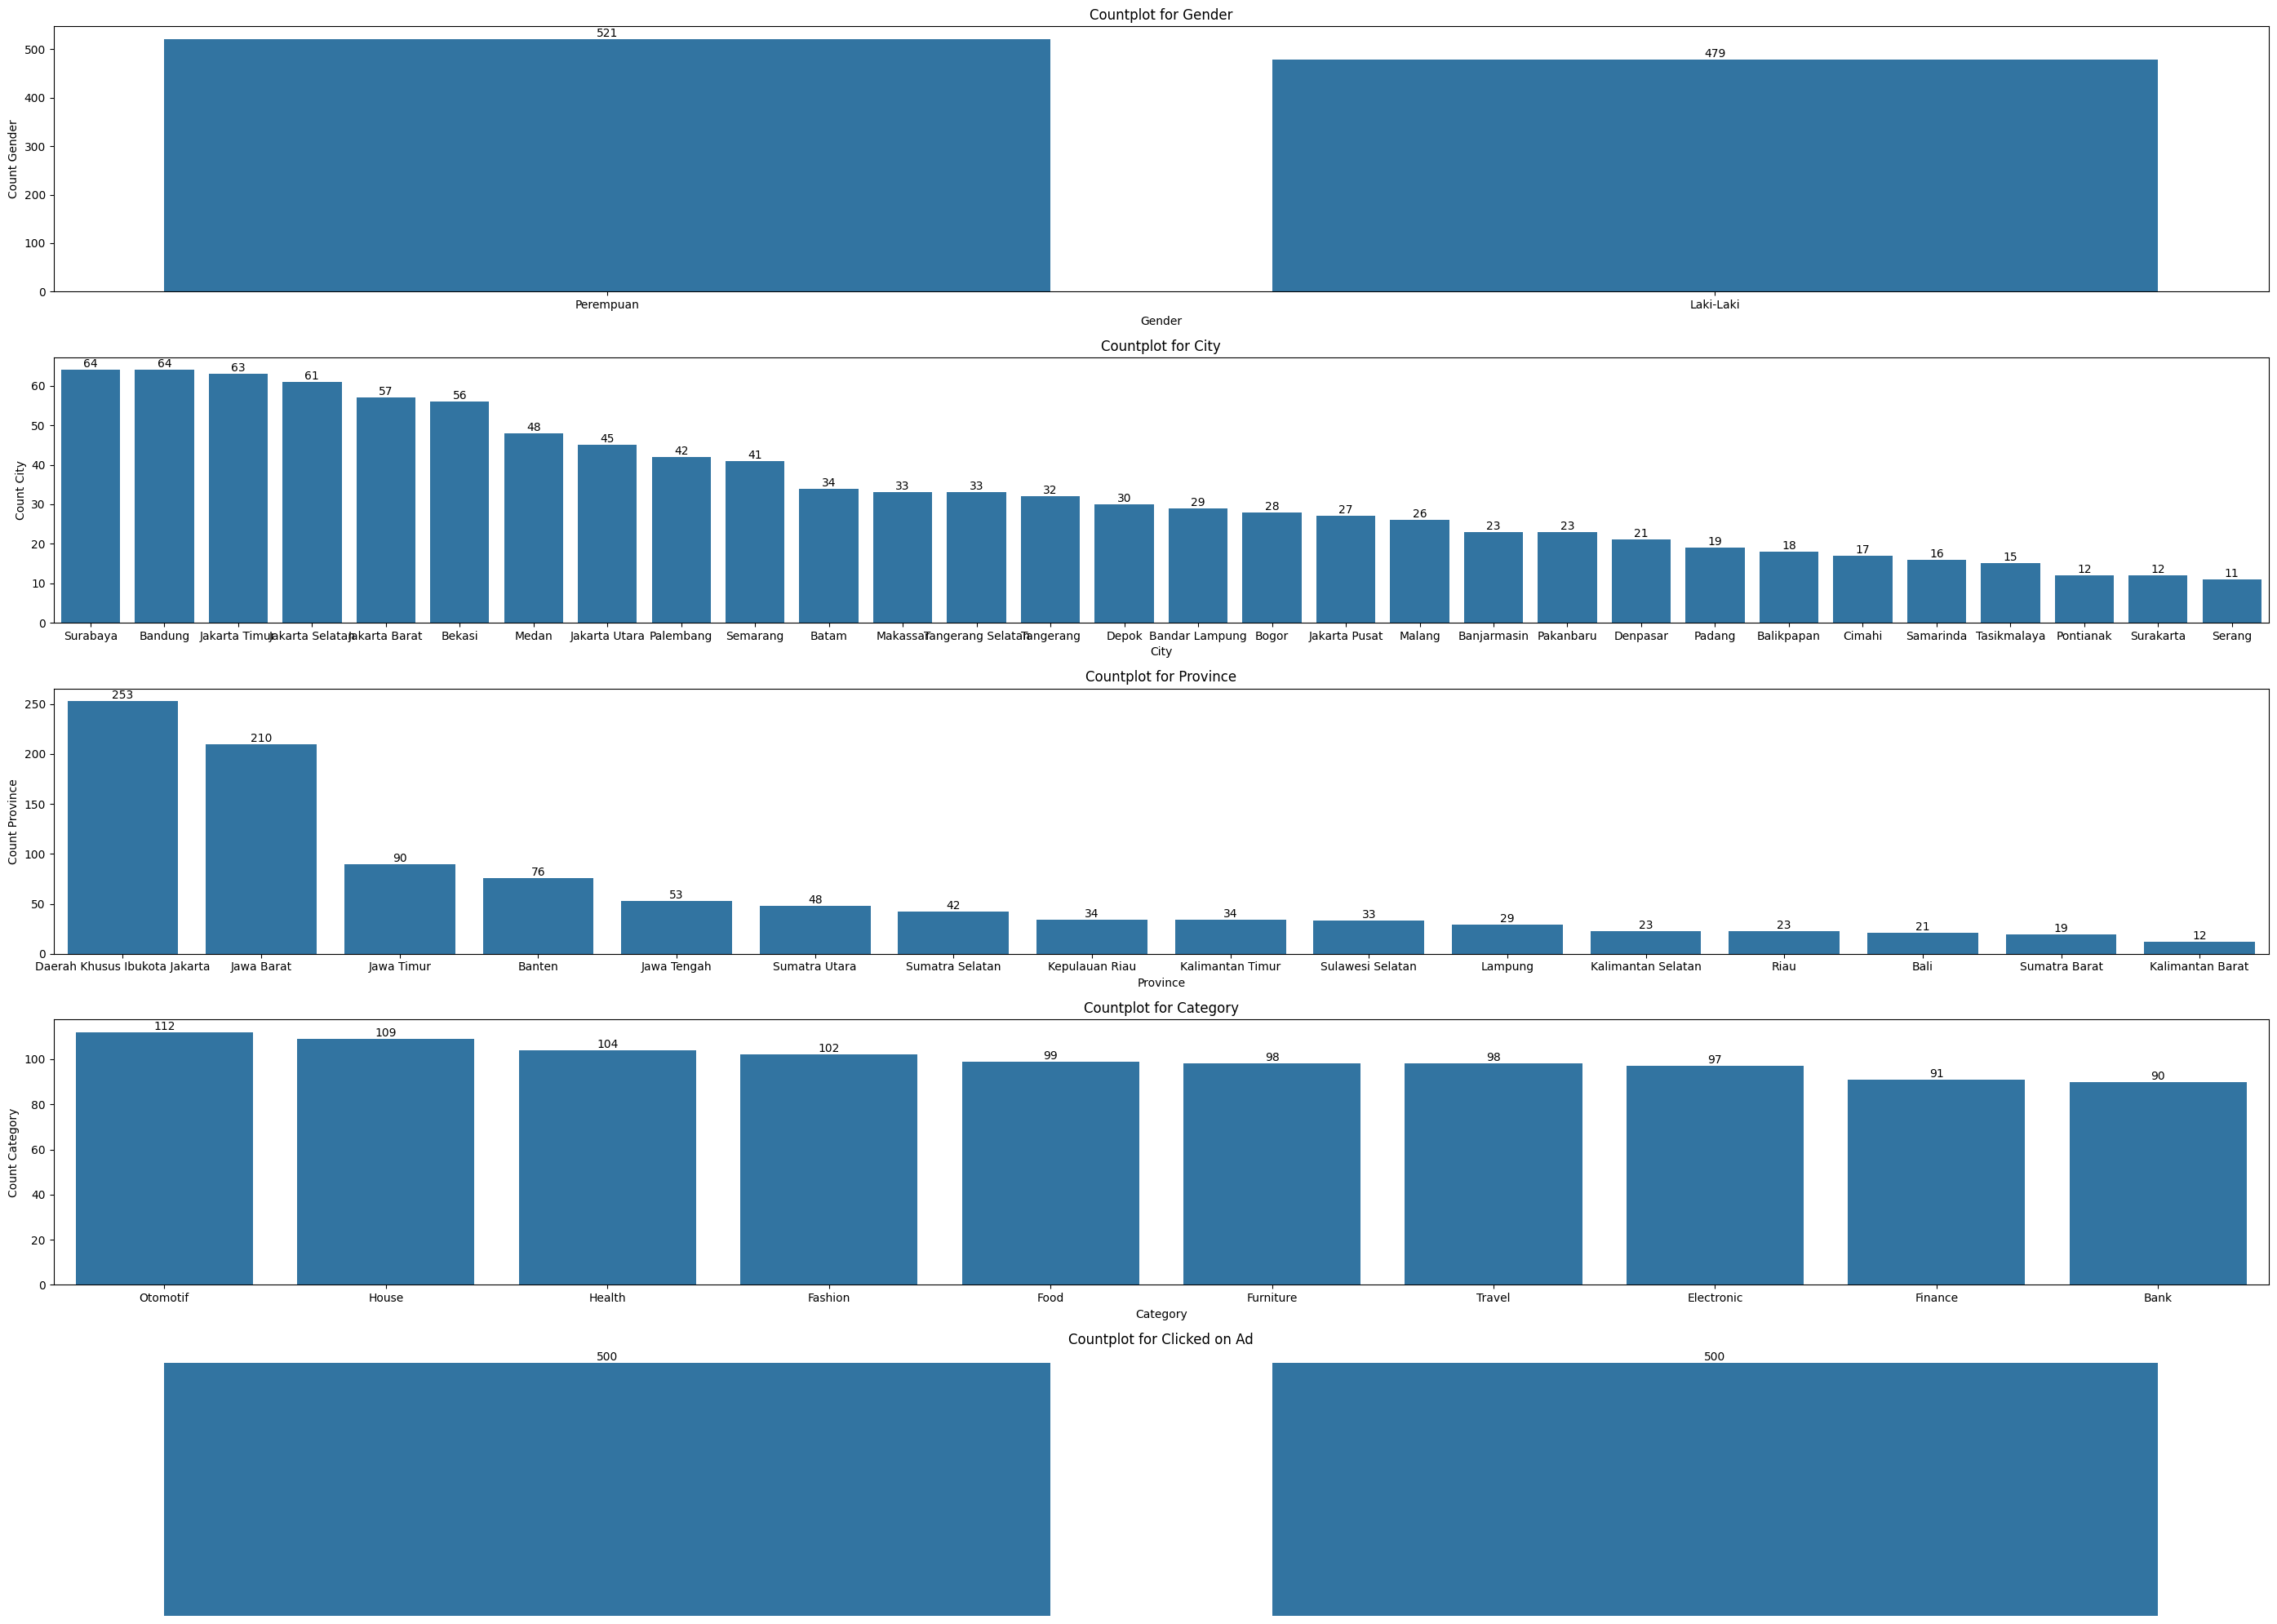

In [134]:
# Categorical Countplot
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(28, 20))
ax = ax.flatten()

for i, col in enumerate(cats_cols):
    sns.countplot(data=df, x=col, ax=ax[i], order=df[col].value_counts().index)
    ax[i].set_title(f'Countplot for {col}')
    ax[i].set_ylabel(f'Count {col}')
    ax[i].tick_params(axis='x')
    ax[i].bar_label(ax[i].containers[0])

ax[-1].axis('off')
plt.tight_layout()
plt.show()

## Bivariate Analysis

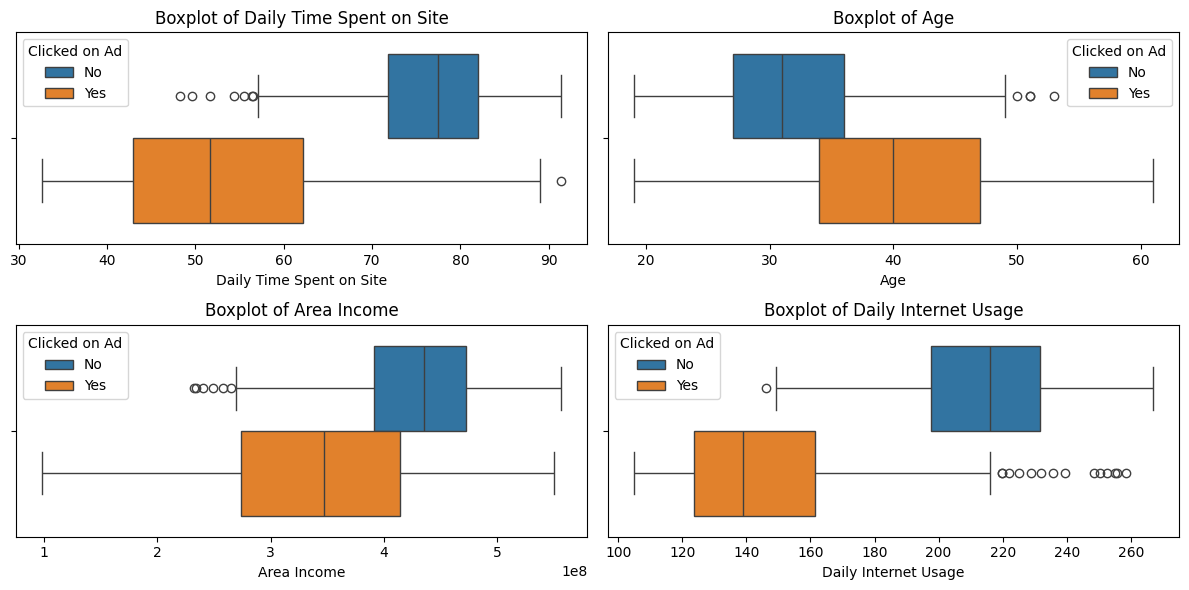

In [135]:
# Boxplot with hue target
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
ax = ax.flatten()

for i, col in enumerate(nums_cols) :
    sns.boxplot(data=df, ax=ax[i], x=col, hue='Clicked on Ad')
    ax[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

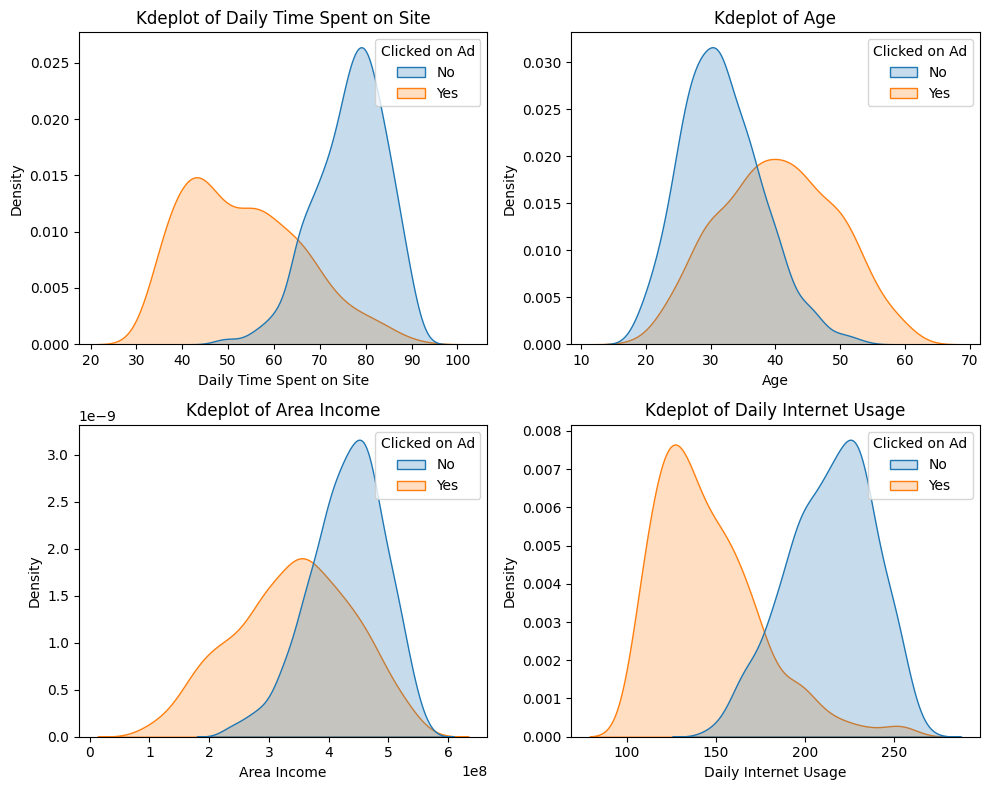

In [136]:
# Kdeplot with hue target
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
ax = ax.flatten()

for i, col in enumerate(nums_cols) :
    sns.kdeplot(data=df, ax=ax[i], x=col, hue='Clicked on Ad', fill=True)
    ax[i].set_title(f'Kdeplot of {col}')

plt.tight_layout()
plt.show()

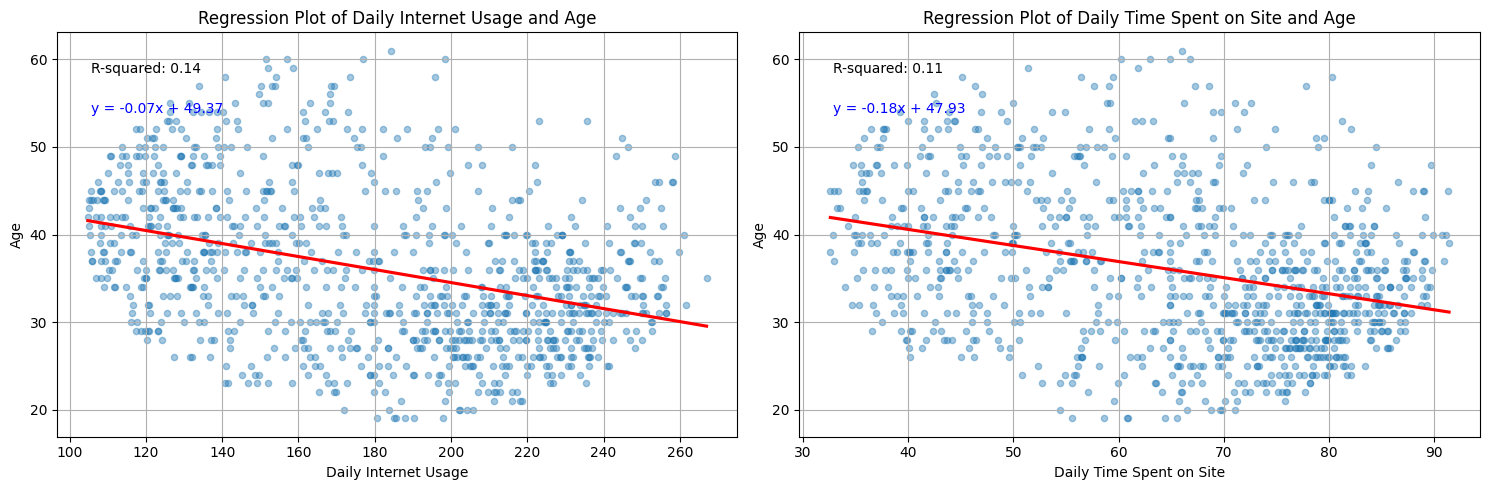

In [137]:
# Regplot of CVR vs Age, Daily Internet Usage, and Daily Time Spent on Site

# Function to calculate R-squared
def calculate_r_squared(x, y, y_pred):
    ss_residual = np.sum((y - y_pred) ** 2)
    ss_total = np.sum((y - np.mean(y)) ** 2)
    r_squared = 1 - (ss_residual / ss_total)
    return r_squared

included_col = ['Daily Internet Usage', 'Daily Time Spent on Site']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax = ax.flatten()

for i, col in enumerate(included_col):
    # Regression plot
    sns.regplot(data=df, ax=ax[i], x=col, y='Age', scatter_kws={'s':20, 'alpha':0.4}, line_kws={'color':'red'}, ci=False)
    ax[i].set_title(f'Regression Plot of {col} and Age')

    # Calculating and displaying R-squared
    x = df[col]
    y = df['Age']
    slope, intercept = np.polyfit(x, y, 1)
    y_pred = slope * x + intercept
    r_squared = calculate_r_squared(x, y, y_pred)
    ax[i].text(0.05, 0.9, f'R-squared: {r_squared:.2f}', transform=ax[i].transAxes)

    # Displaying regression equation
    ax[i].annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy=(0.05, 0.8), xycoords='axes fraction', fontsize=10, color='blue')

    ax[i].grid(True)
    
plt.tight_layout()
plt.show()

- A low R-squared value (close to 0) suggests that the independent variable(s) does not explain much of the variability in the dependent variable, indicating a weak relationship.
- An R-squared value around 0.11 could be considered a weak to modest relationship.

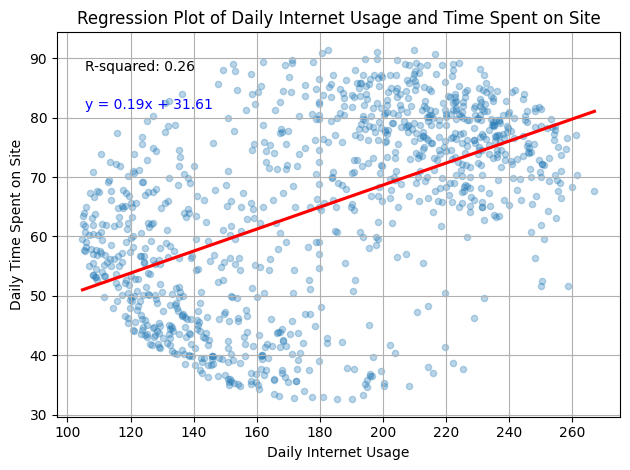

In [138]:
# Regplot of Daily Internet Usage  Daily and Time Spent on Site

# Function to calculate R-squared
def calculate_r_squared(x, y, y_pred):
    ss_residual = np.sum((y - y_pred) ** 2)
    ss_total = np.sum((y - np.mean(y)) ** 2)
    r_squared = 1 - (ss_residual / ss_total)
    return r_squared

regplot = sns.regplot(data=df, x='Daily Internet Usage', y='Daily Time Spent on Site', scatter_kws={'s':20, 'alpha':0.3}, line_kws={'color':'red'}, ci=False)

# Calculating and displaying R-squared
x = df['Daily Internet Usage']
y = df['Daily Time Spent on Site']
slope, intercept = np.polyfit(x, y, 1)
y_pred = slope * x + intercept
r_squared = calculate_r_squared(x, y, y_pred)

plt.text(0.05, 0.9, f'R-squared: {r_squared:.2f}', transform=regplot.transAxes)
plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy=(0.05, 0.8), xycoords='axes fraction', fontsize=10, color='blue')
plt.title(f'Regression Plot of Daily Internet Usage and Time Spent on Site')
plt.grid(True)
    
plt.tight_layout()
plt.show()

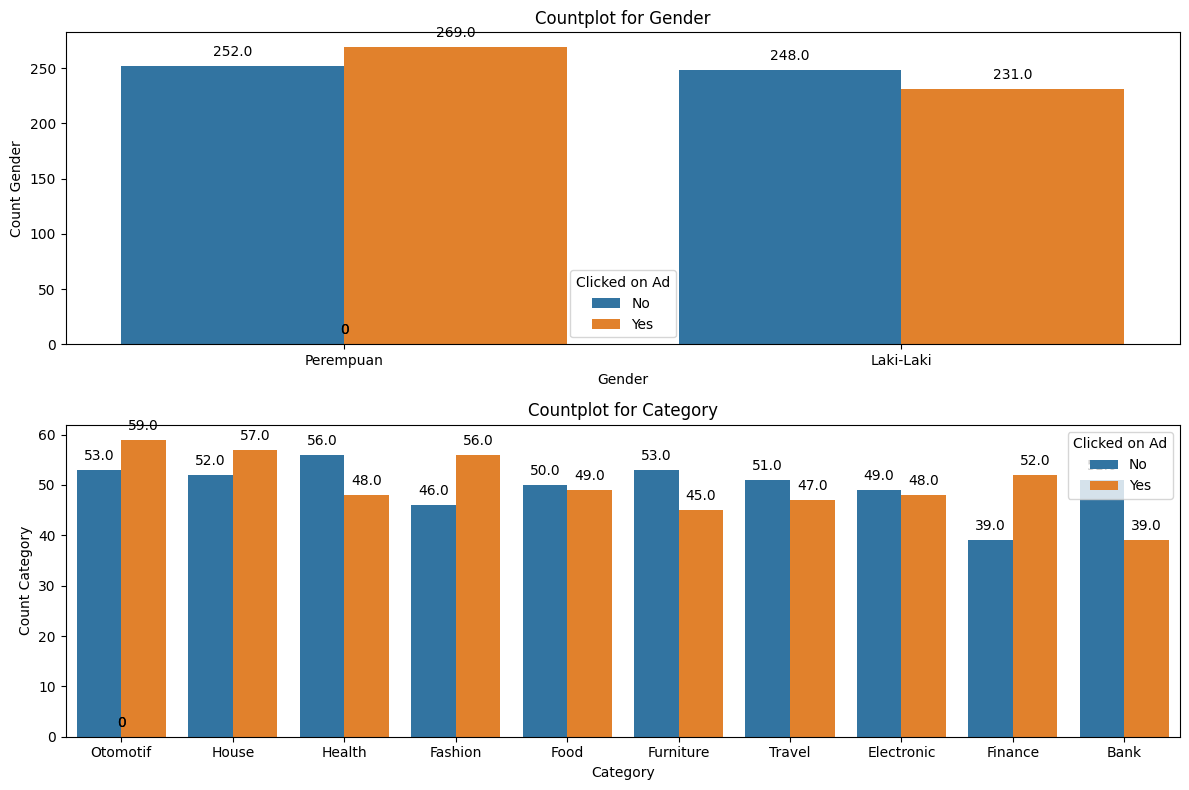

In [139]:
# Categorical Countplot with hue target (only for gender and category)
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
ax = ax.flatten()

cats_cols_few = ['Gender', 'Category']

for i, col in enumerate(cats_cols_few):
    sns.countplot(data=df, x=col, ax=ax[i], order=df[col].value_counts().index, hue='Clicked on Ad')
    ax[i].set_title(f'Countplot for {col}')
    ax[i].set_ylabel(f'Count {col}')
    ax[i].tick_params(axis='x')
    
    # Adding annotations on top of each bar
    for p in ax[i].patches:
        ax[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

There is not much difference between clicked and not cliked on the advertisement.

## Multivariate Analysis

As we have seen from the regression plot before that the numerical distribution is not linear, so we use methods of calculating the correlation that can capture non-linear relationship better.

**Reminder About Correlation Method**

If you have a non-linear distribution of your numerical features, using Pearson correlation may not capture the full extent of the relationship between variables because Pearson correlation measures linear relationships. In such cases, Spearman and Kendall correlations can be more appropriate alternatives as they are non-parametric measures and can capture monotonic relationships, which may better reflect non-linear associations.

Here's a brief overview of each correlation method and its suitability for different types of relationships:

1. **Pearson Correlation**:
   - Measures the linear relationship between two continuous variables.
   - Assumes that variables are normally distributed and have a linear relationship.
   - Sensitive to outliers.
   - Suitable for linear relationships.

2. **Spearman Correlation**:
   - Measures the strength and direction of monotonic relationships between two continuous or ordinal variables.
   - Does not assume linearity.
   - More robust to outliers compared to Pearson correlation.
   - Suitable for non-linear relationships.

3. **Kendall Correlation**:
   - Measures the strength and direction of ordinal relationships between two variables.
   - Does not assume linearity.
   - Less affected by outliers compared to Pearson correlation.
   - Suitable for non-linear relationships, especially when the data is ranked or ordinal.

In summary, if you suspect that your data has non-linear relationships, it's advisable to calculate both Spearman and Kendall correlations in addition to Pearson correlation to capture different aspects of the relationships. This allows you to have a more comprehensive understanding of the associations between variables. Additionally, visual exploration through scatter plots or other graphical techniques can also provide insights into the nature of the relationships between variables.

Text(0.5, 1.0, 'Spearman Correlation')

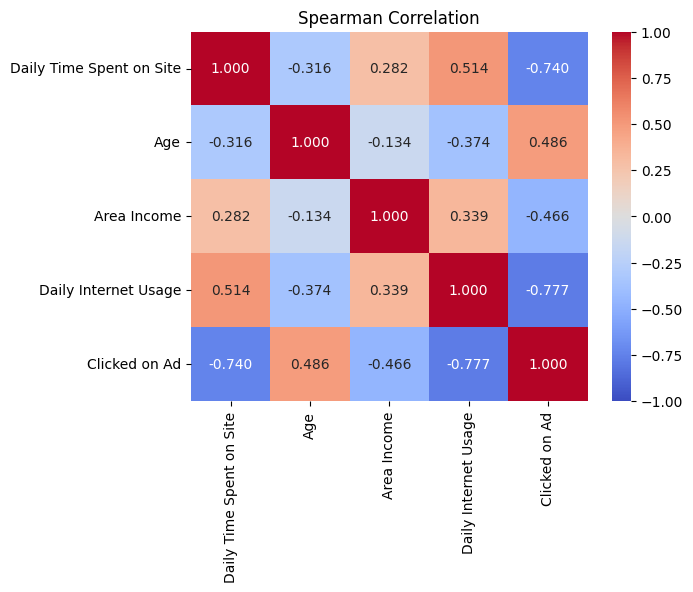

In [140]:
# Heatmap of numerical values (Spearman method)
df['Clicked on Ad'] = df['Clicked on Ad'].replace({'No' : 0, # Quick label encoding for target
                                                   'Yes' : 1})

fig, ax = plt.subplots()
sns.heatmap(data=df.corr(method='spearman', numeric_only=True),annot=True, cmap='coolwarm', fmt='.3f', vmin=-1, vmax=1)
plt.title('Spearman Correlation')

In [187]:
# Feature-Feature correlation representation in tabular form 
corr_feature = df.corr(method='spearman', numeric_only=True)

# Flatten correlation matrix.
flat_cm = corr_feature.stack().reset_index()
flat_cm.columns = ['A', 'B', 'Corr Value']

flat_cm = flat_cm.loc[flat_cm['Corr Value'] < 1, :]
flat_cm = flat_cm[(flat_cm['A'] != 'Clicked on Ad') & (flat_cm['B'] != 'Clicked on Ad')]

flat_cm['Corr Type'] = flat_cm['Corr Value'].apply(lambda x : 'Positive' if x >= 0 else 'Negative')
flat_cm['Corr Value'] = flat_cm['Corr Value'].apply(lambda x : abs(x))
flat_cm = flat_cm.sort_values(by='Corr Value', ascending=False, ignore_index=True)

redundan_cm = flat_cm.drop_duplicates(subset=['Corr Value', 'Corr Type']).reset_index(drop=True)
redundan_cm

A                     B  Corr Value Corr Type
0  Daily Time Spent on Site  Daily Internet Usage    0.514424  Positive
1                       Age  Daily Internet Usage    0.374039  Negative
2               Area Income  Daily Internet Usage    0.339034  Positive
3  Daily Time Spent on Site                   Age    0.315546  Negative
4  Daily Time Spent on Site           Area Income    0.282280  Positive
5                       Age           Area Income    0.134418  Negative

In [192]:
# Feature-Target correlation representation in tabular form 
corr_target = df.corrwith(df['Clicked on Ad'], method='spearman', numeric_only=True)
corr = corr_target.reset_index(name='Corr Value')
corr = corr[corr['index'] != "Clicked on Ad"]
corr = corr.rename(columns={'index' : 'Feature'})

corr['Corr Type'] = corr['Corr Value'].apply(lambda x : 'Positive' if x >= 0 else 'Negative')
corr['Corr Value'] = corr['Corr Value'].apply(lambda x : abs(x))
corr = corr.sort_values('Corr Value', ascending=False, ignore_index=True)
corr

Feature  Corr Value Corr Type
0      Daily Internet Usage    0.777141  Negative
1  Daily Time Spent on Site    0.739857  Negative
2                       Age    0.486337  Positive
3               Area Income    0.466317  Negative

Text(0.5, 1.0, 'Kendall Correlation')

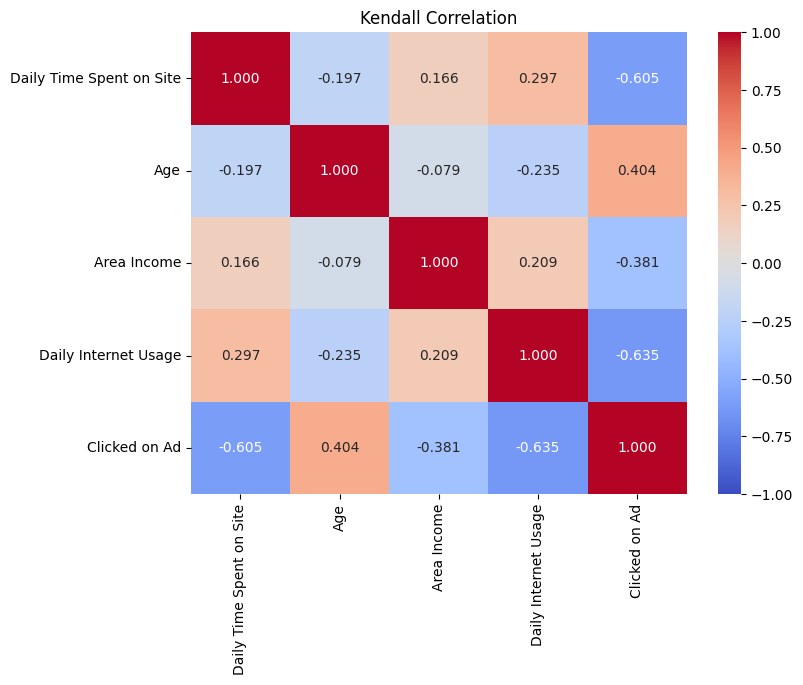

In [143]:
# Heatmap of numerical values (Kendall method)
plt.figure(figsize=(8,6))
sns.heatmap(data=df.corr(method='kendall', numeric_only=True),annot=True, cmap='coolwarm', fmt='.3f', vmin=-1, vmax=1)
plt.title('Kendall Correlation')

In [189]:
# Feature-Feature correlation representation in tabular form 
corr_feature = df.corr(method='kendall', numeric_only=True)

# Flatten correlation matrix.
flat_cm = corr_feature.stack().reset_index()
flat_cm.columns = ['A', 'B', 'Corr Value']

flat_cm = flat_cm.loc[flat_cm['Corr Value'] < 1, :]
flat_cm = flat_cm[(flat_cm['A'] != 'Clicked on Ad') & (flat_cm['B'] != 'Clicked on Ad')]

flat_cm['Corr Type'] = flat_cm['Corr Value'].apply(lambda x : 'Positive' if x >= 0 else 'Negative')
flat_cm['Corr Value'] = flat_cm['Corr Value'].apply(lambda x : abs(x))
flat_cm = flat_cm.sort_values(by='Corr Value', ascending=False, ignore_index=True)

redundan_cm = flat_cm.drop_duplicates(subset=['Corr Value', 'Corr Type']).reset_index(drop=True)
redundan_cm

A                     B  Corr Value Corr Type
0  Daily Time Spent on Site  Daily Internet Usage    0.296879  Positive
1                       Age  Daily Internet Usage    0.235123  Negative
2               Area Income  Daily Internet Usage    0.208690  Positive
3  Daily Time Spent on Site                   Age    0.196764  Negative
4  Daily Time Spent on Site           Area Income    0.166381  Positive
5                       Age           Area Income    0.079231  Negative

In [191]:
# Feature-Target correlation representation in tabular form 
corr_target = df.corrwith(df['Clicked on Ad'], method='kendall', numeric_only=True)
corr = corr_target.reset_index(name='Corr Value')
corr = corr[corr['index'] != "Clicked on Ad"]
corr = corr.rename(columns={'index' : 'Feature'})

corr['Corr Type'] = corr['Corr Value'].apply(lambda x : 'Positive' if x >= 0 else 'Negative')
corr['Corr Value'] = corr['Corr Value'].apply(lambda x : abs(x))
corr = corr.sort_values('Corr Value', ascending=False, ignore_index=True)
corr

Feature  Corr Value Corr Type
0      Daily Internet Usage    0.634906  Negative
1  Daily Time Spent on Site    0.604501  Negative
2                       Age    0.403634  Positive
3               Area Income    0.380971  Negative

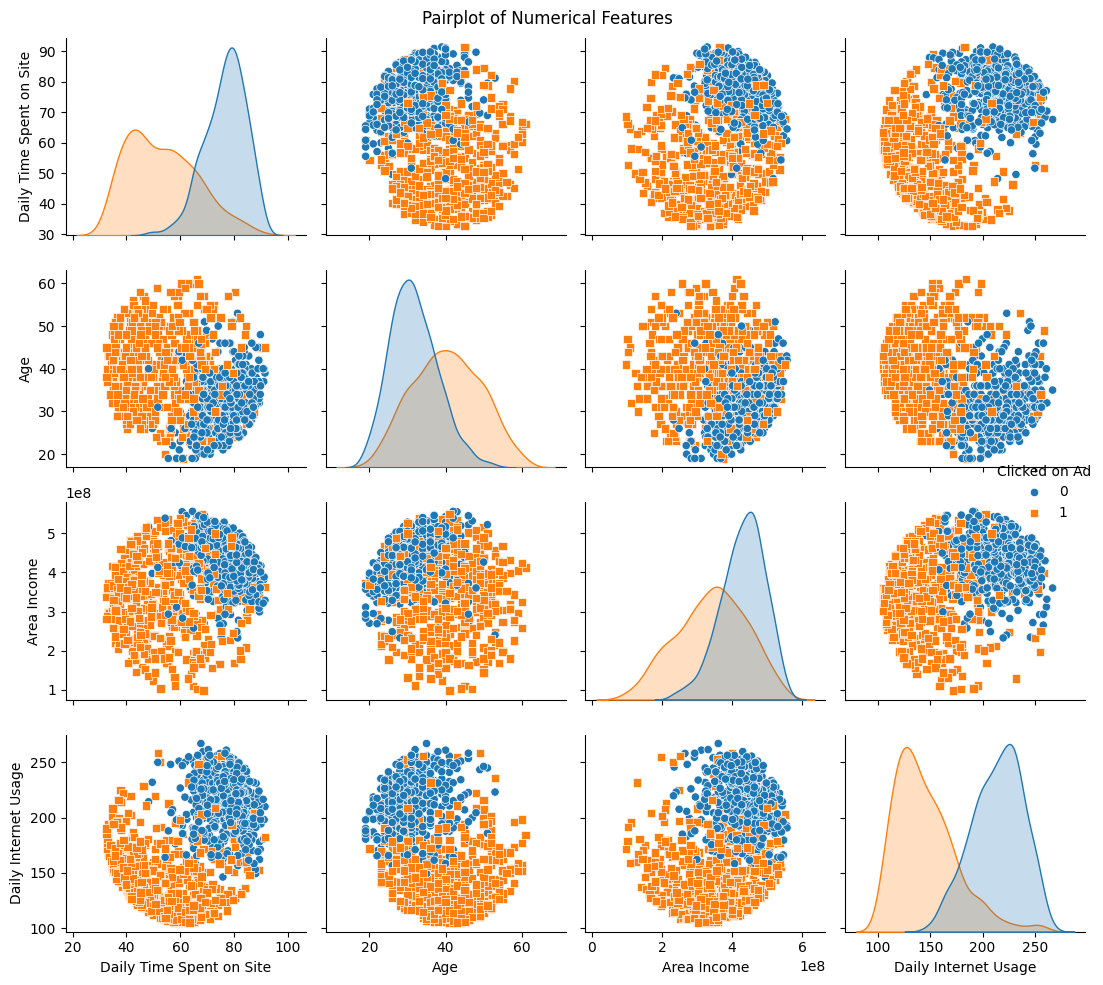

In [145]:
# Pairplot of numerical features
sns.pairplot(data=df, diag_kind='kde', hue='Clicked on Ad', markers=['o', 's'])
plt.suptitle('Pairplot of Numerical Features')
plt.tight_layout()
plt.show()

This is quite an interesting segmentation of target variable. One of them that the values distribution is not linear.

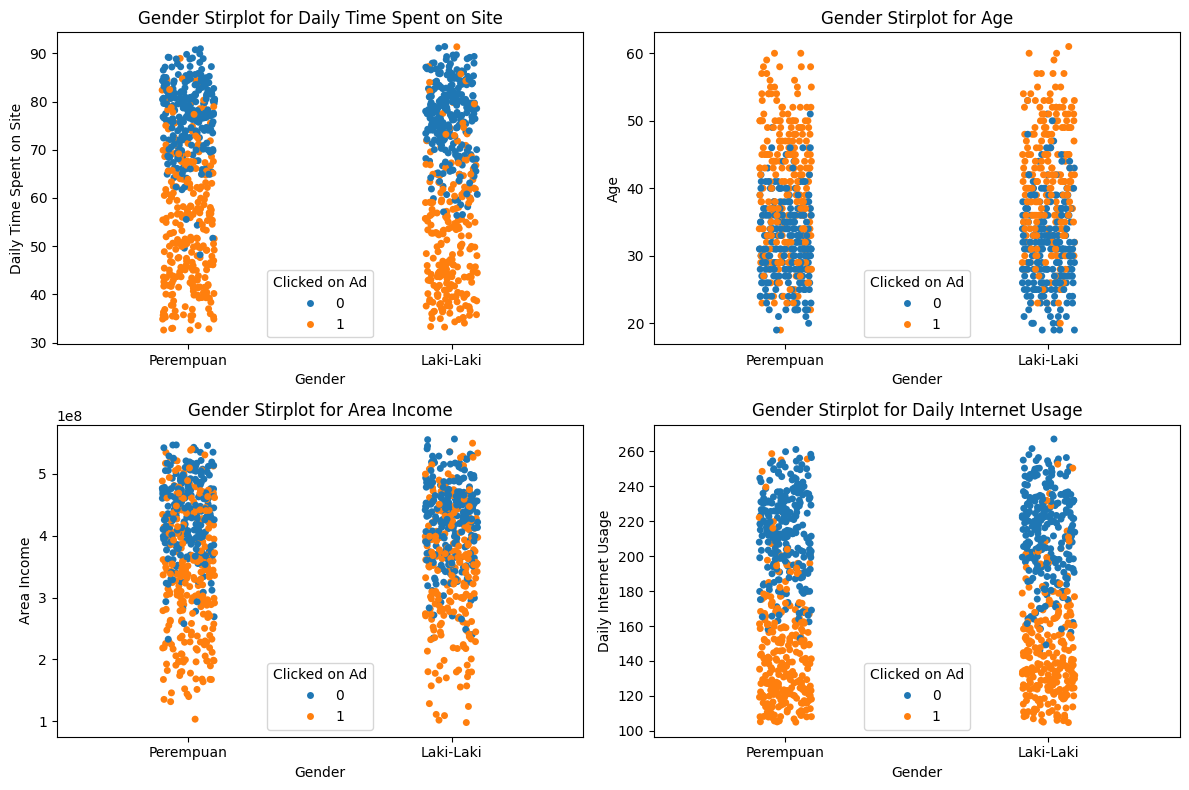

In [146]:
# Stripplot for Gender
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
ax = ax.flatten()

for i, col in enumerate(nums_cols):
    sns.stripplot(data=df, ax=ax[i], x='Gender', y=col, hue='Clicked on Ad')    
    ax[i].set_title(f'Gender Stirplot for {col}')

plt.tight_layout()
plt.show()

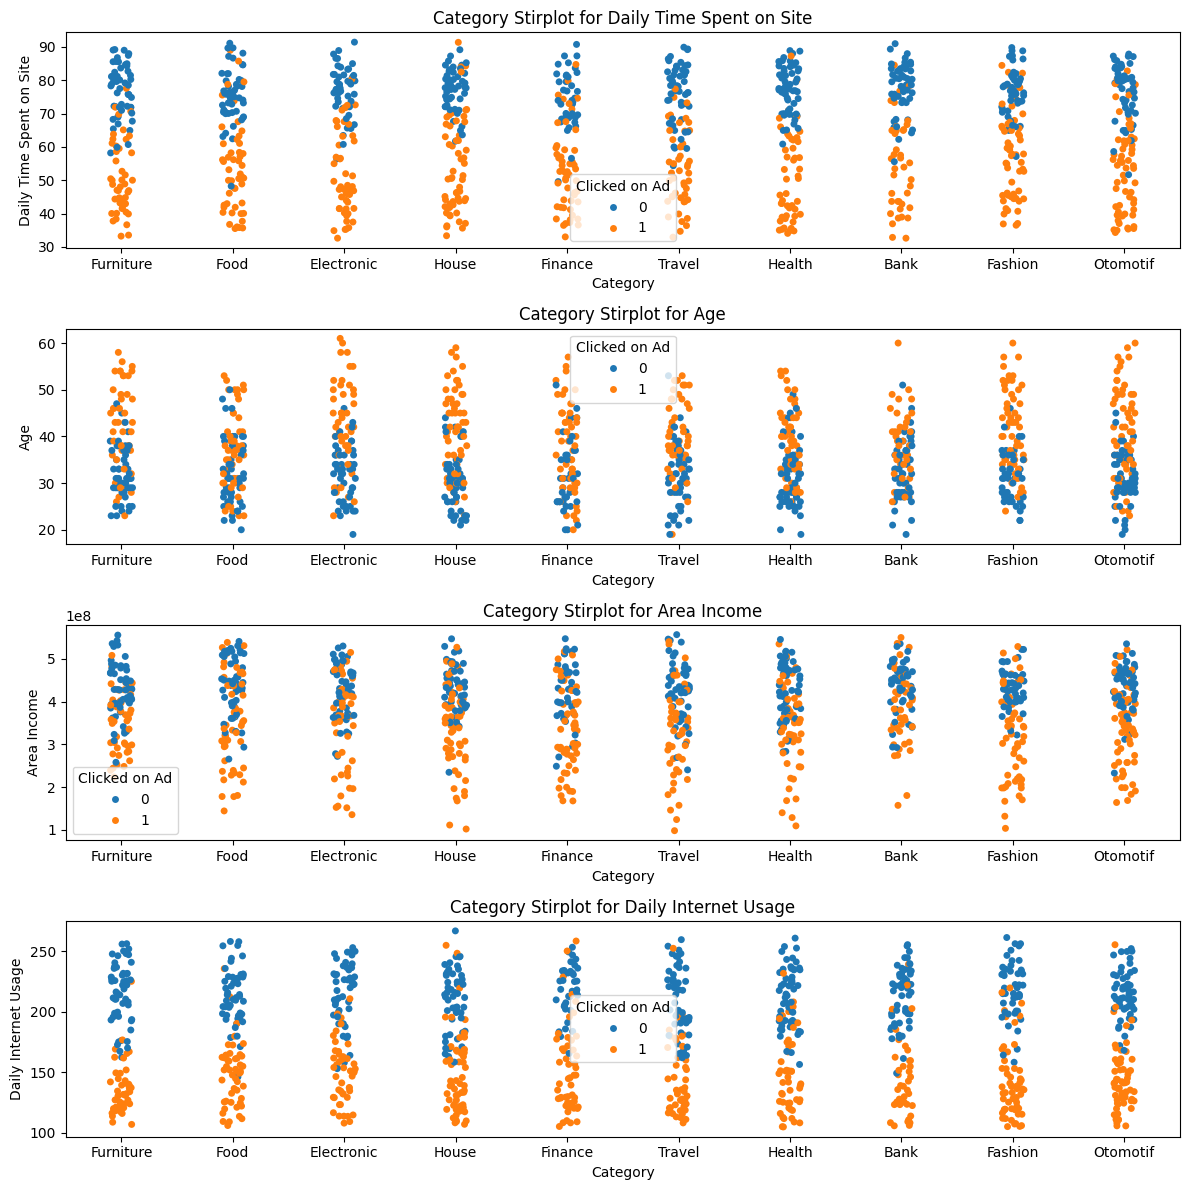

In [147]:
# Stripplot for Category
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(12, 12))
ax = ax.flatten()

for i, col in enumerate(nums_cols):
    sns.stripplot(data=df, ax=ax[i], x='Category', y=col, hue='Clicked on Ad')    
    ax[i].set_title(f'Category Stirplot for {col}')
    # ax[i].legend().remove()

plt.tight_layout()
plt.show()

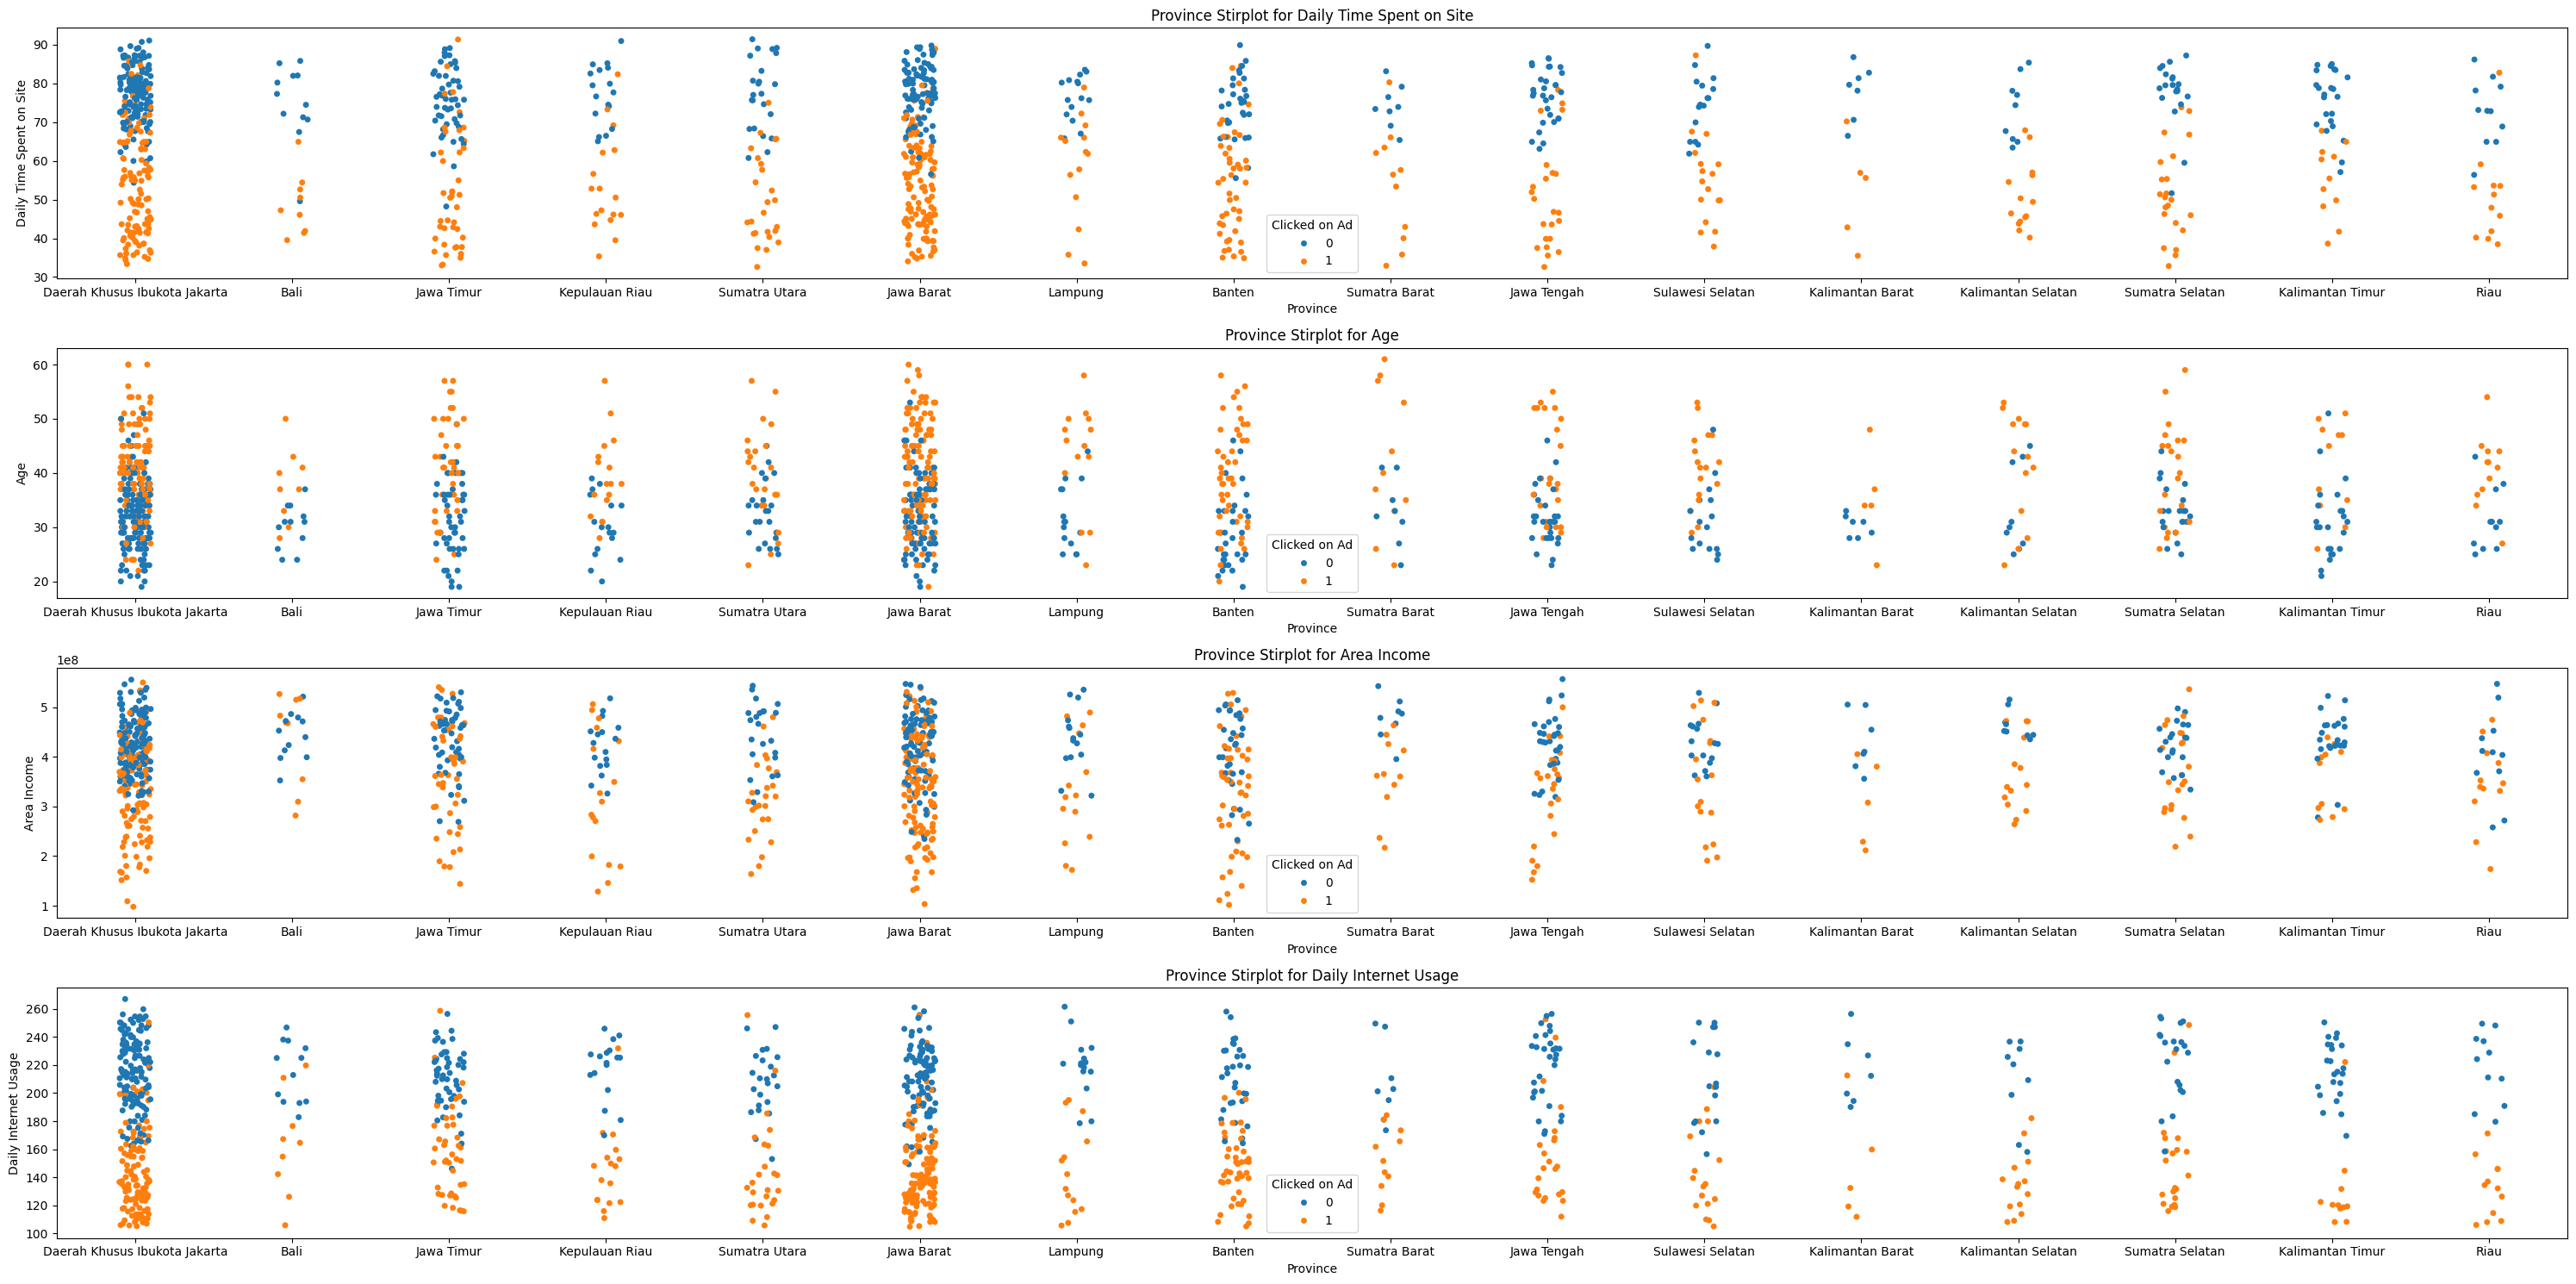

In [148]:
# Stripplot for Province
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(30, 15))
ax = ax.flatten()

for i, col in enumerate(nums_cols):
    sns.stripplot(data=df, ax=ax[i], x='Province', y=col, hue='Clicked on Ad')    
    ax[i].set_title(f'Province Stirplot for {col}')
    # ax[i].legend().remove()

plt.tight_layout()
plt.show()

# **STAGE 2 : DATA PREPROCESSING**

## Feature Engineering

In [149]:
# Make a copy of original dataframe for preprocessing and encoding process
df_preprocessed = df.copy()
df_preprocessed.sample(5)

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
118                     84.45   50  208094530.0                207.18   
684                     42.06   34  302688330.0                131.55   
969                     63.04   27  488493950.0                159.05   
866                     86.58   32  421062390.0                195.93   
876                     67.39   44  358800820.0                107.19   

        Gender          Visit Time           City  \
118  Perempuan 2016-07-13 04:10:00       Surabaya   
684  Perempuan 2016-06-29 02:48:00      Palembang   
969  Perempuan 2016-07-10 16:25:00  Jakarta Barat   
866  Laki-Laki 2016-02-26 23:44:00  Jakarta Barat   
876  Perempuan 2016-01-24 13:41:00      Tangerang   

                          Province    Category  Clicked on Ad  
118                     Jawa Timur     Fashion              1  
684                Sumatra Selatan       House              1  
969  Daerah Khusus Ibukota Jakarta       House              1  
866  Daerah Khusus Ibukota Jakarta  Electronic              0  
876                         Banten     Fashion              1

### Age Group

The `Age Group` column is created by grouping the `Age` column. But first we need check the distribution of age to help with the grouping range.

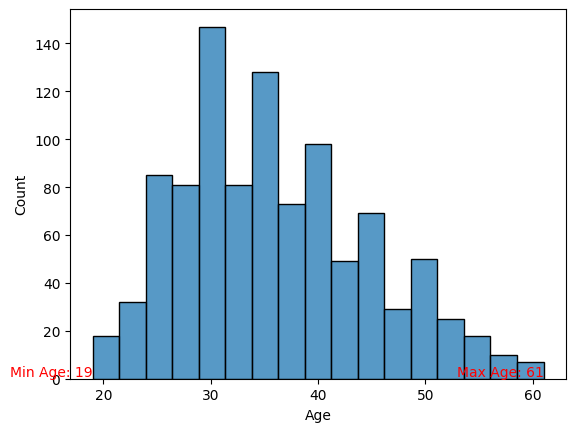

In [150]:
min_age = df_preprocessed['Age'].min()
max_age = df_preprocessed['Age'].max()

sns.histplot(data=df, x='Age')
plt.text(min_age, 0, f'Min Age: {min_age}', ha='right', va='bottom', color='red')
plt.text(max_age, 0, f'Max Age: {max_age}', ha='right', va='bottom', color='red')
plt.show()

In [151]:
# Age Group
def age_grouping(age) :
    if age >= 50 :
        group = 'Senior Adult'
    elif age >= 30 :
        group = 'Middle Adult'
    else :
        group = 'Young Adult'
    return group

df_preprocessed['Age Group'] = df_preprocessed['Age'].apply(age_grouping)

### Area Income Group

The `Area Income Group` column is created by grouping the `Area Income` column. Same as before procedure will be done for this column.

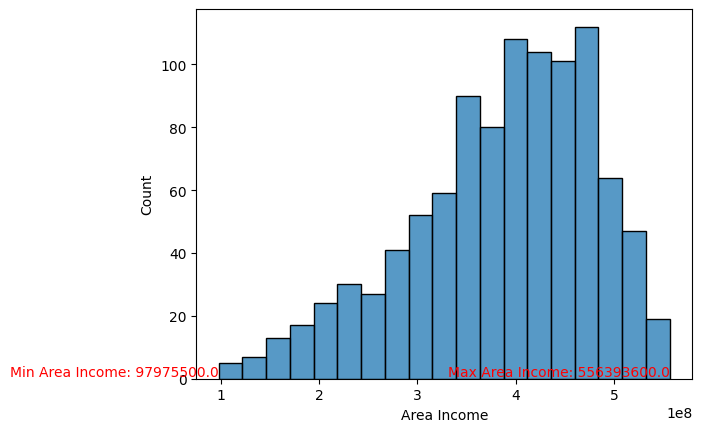

In [152]:
min_age = df_preprocessed['Area Income'].min()
max_age = df_preprocessed['Area Income'].max()

sns.histplot(data=df, x='Area Income')
plt.text(min_age, 0, f'Min Area Income: {min_age}', ha='right', va='bottom', color='red')
plt.text(max_age, 0, f'Max Area Income: {max_age}', ha='right', va='bottom', color='red')
plt.show()

Since the distribution is skewed, we will rely on quantiles for grouping.

In [153]:
q1 = np.percentile(df_preprocessed['Area Income'], 25)
q2 = np.percentile(df_preprocessed['Area Income'], 50)
q3 = np.percentile(df_preprocessed['Area Income'], 75)

def income_grouping(income):
    if income <= q1 :
        group = 'Low Income'
    elif income <= q2 :
        group = 'Medium-Low Income'
    elif income <= q3 :
        group = 'Medium-High Income'
    else :
        group = 'High Income'
    return group

df_preprocessed['Area Income Group'] = df_preprocessed['Area Income'].apply(income_grouping)

### Datetime Components Columns (Month, Day, etc)

In [154]:
df_preprocessed['Visit Time'].describe()

count                          1000
mean     2016-04-10 10:33:36.840000
min             2016-01-01 02:52:00
25%             2016-02-18 02:55:15
50%             2016-04-07 17:27:00
75%             2016-05-31 03:18:00
max             2016-07-24 00:22:00
Name: Visit Time, dtype: object

As we have discovered before that the data only have information of 6/7 months of campaign data. So we won't need to extract the year component.

**Reminder :**

For datetime extraction methods check here : https://pandas.pydata.org/docs/user_guide/timeseries.html#time-date-components

In [155]:
df_preprocessed['Visit Month'] = df_preprocessed['Visit Time'].dt.month
df_preprocessed['Visit Day'] = df_preprocessed['Visit Time'].dt.day
df_preprocessed['Visit Hour'] = df_preprocessed['Visit Time'].dt.hour
df_preprocessed['Is Visit Day Weekend'] = df_preprocessed['Visit Time'].dt.day_of_week.isin([5, 6]).astype(int)

In [156]:
df_preprocessed['Is Visit Day Weekend'].value_counts()

Is Visit Day Weekend
0    715
1    285
Name: count, dtype: int64

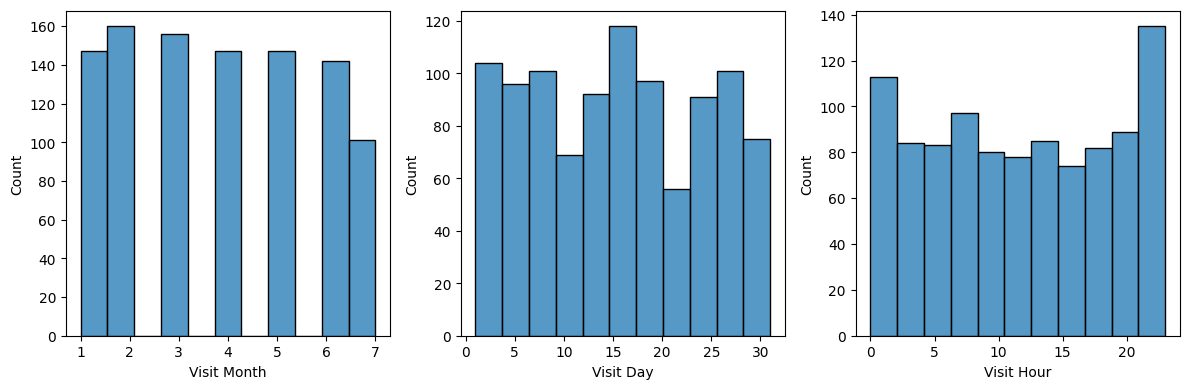

In [157]:
# Datetime component analysis
datetime_cols_analysis = ['Visit Month', 'Visit Day', 'Visit Hour']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
ax = ax.flatten()

for i, col in enumerate(datetime_cols_analysis) :
    sns.histplot(data=df_preprocessed, ax=ax[i], x=col)

plt.tight_layout()
plt.show()

There are not much of a difference between the visit time component of our site. The distributions are uniform.

In [158]:
# Re-check dataframe after feature engineering process
df_preprocessed.sample(5)

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
131                     41.67   36  376719140.0                132.55   
485                     66.88   35  439536720.0                119.47   
494                     67.80   30  278667830.0                117.75   
946                     72.82   34  530388740.0                191.82   
186                     46.31   57  309739640.0                153.98   

        Gender          Visit Time           City  \
131  Perempuan 2016-06-13 18:50:00          Medan   
485  Laki-Laki 2016-03-23 19:58:00         Cimahi   
494  Laki-Laki 2016-03-03 02:59:00      Samarinda   
946  Laki-Laki 2016-01-27 16:06:00  Jakarta Pusat   
186  Laki-Laki 2016-03-24 13:37:00          Batam   

                          Province Category  Clicked on Ad     Age Group  \
131                  Sumatra Utara   Health              1  Middle Adult   
485                     Jawa Barat  Fashion              1  Middle Adult   
494               Kalimantan Timur    House              1  Middle Adult   
946  Daerah Khusus Ibukota Jakarta     Food              0  Middle Adult   
186                 Kepulauan Riau    House              1  Senior Adult   

      Area Income Group  Visit Month  Visit Day  Visit Hour  \
131   Medium-Low Income            6         13          18   
485  Medium-High Income            3         23          19   
494          Low Income            3          3           2   
946         High Income            1         27          16   
186          Low Income            3         24          13   

     Is Visit Day Weekend  
131                     0  
485                     0  
494                     0  
946                     0  
186                     0

## Feature Encoding

In [159]:
# Re-check the unique values of categorical features to determine encoding technique
encoded_features = ['Gender', 'City', 'Province', 'Category', 'Age Group', 'Area Income Group']

for col in encoded_features :
    print(f'======={col}=======')
    print(df_preprocessed[col].unique())
    print()

=======Gender=======
['Perempuan' 'Laki-Laki']

=======City=======
['Jakarta Timur' 'Denpasar' 'Surabaya' 'Batam' 'Medan' 'Jakarta Barat'
 'Bandung' 'Bandar Lampung' 'Jakarta Pusat' 'Depok' 'Serang' 'Padang'
 'Semarang' 'Makassar' 'Malang' 'Jakarta Utara' 'Pontianak'
 'Jakarta Selatan' 'Tasikmalaya' 'Surakarta' 'Bekasi' 'Tangerang' 'Cimahi'
 'Banjarmasin' 'Palembang' 'Samarinda' 'Pakanbaru' 'Tangerang Selatan'
 'Bogor' 'Balikpapan']

=======Province=======
['Daerah Khusus Ibukota Jakarta' 'Bali' 'Jawa Timur' 'Kepulauan Riau'
 'Sumatra Utara' 'Jawa Barat' 'Lampung' 'Banten' 'Sumatra Barat'
 'Jawa Tengah' 'Sulawesi Selatan' 'Kalimantan Barat' 'Kalimantan Selatan'
 'Sumatra Selatan' 'Kalimantan Timur' 'Riau']

=======Category=======
['Furniture' 'Food' 'Electronic' 'House' 'Finance' 'Travel' 'Health'
 'Bank' 'Fashion' 'Otomotif']

=======Age Group=======
['Middle Adult' 'Young Adult' 'Senior Adult']

=======Area Income Group=======
['Medium-High Income' 'High Income' 'Medium-Low Income' '

In [160]:
# Label encoding for Gender, Age Group, and Area Income Group
df_preprocessed['Gender'] = df_preprocessed['Gender'].replace({'Perempuan' : 0,
                                                                'Laki-Laki' : 1})


df_preprocessed['Age Group'] = df_preprocessed['Age Group'].replace({'Young Adult' : 0,
                                                                    'Middle Adult' : 1,
                                                                    'Senior Adult' : 2})

df_preprocessed['Area Income Group'] = df_preprocessed['Area Income Group'].replace({'Low Income' : 0,
                                                                                    'Medium-Low Income' : 1,
                                                                                    'Medium-High Income' : 2,
                                                                                    'High Income' : 3})

In [161]:
# One-hot encoding for City, Province, and Category
one_hot_columns = ['City', 'Province', 'Category']

for col in one_hot_columns :
    onehots = pd.get_dummies(df_preprocessed[col], prefix=col)
    onehots = onehots.astype(int)
    df_preprocessed = pd.concat([df_preprocessed, onehots], axis=1)

# Drop the original columns after one-hot encoding
df_preprocessed.drop(one_hot_columns, axis=1, inplace=True)

In [162]:
# Re-check final dataframe after encoding process
df_preprocessed

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Gender  \
0                   68.950000   35  432837300.0                256.09       0   
1                   80.230000   31  479092950.0                193.77       1   
2                   69.470000   26  418501580.0                236.50       0   
3                   74.150000   29  383643260.0                245.89       1   
4                   68.370000   35  517229930.0                225.58       0   
..                        ...  ...          ...                   ...     ...   
995                 72.970000   30  499691990.0                208.58       1   
996                 51.300000   45  474475190.0                134.42       1   
997                 64.929524   51  296910040.0                120.37       1   
998                 55.550000   19  293445530.0                187.95       0   
999                 45.010000   26  209130600.0                178.35       0   

             Visit Time  Clicked on Ad  Age Group  Area Income Group  \
0   2016-03-27 00:53:00              0          1                  2   
1   2016-04-04 01:39:00              0          1                  3   
2   2016-03-13 20:35:00              0          0                  2   
3   2016-01-10 02:31:00              0          0                  1   
4   2016-06-03 03:36:00              0          1                  3   
..                  ...            ...        ...                ...   
995 2016-02-11 21:49:00              1          1                  3   
996 2016-04-22 02:07:00              1          1                  3   
997 2016-02-01 17:24:00              1          2                  0   
998 2016-03-24 02:35:00              0          0                  0   
999 2016-06-03 21:43:00              1          0                  0   

     Visit Month  Visit Day  Visit Hour  Is Visit Day Weekend  \
0              3         27           0                     1   
1              4          4           1                     0   
2              3         13          20                     1   
3              1         10           2                     1   
4              6          3           3                     0   
..           ...        ...         ...                   ...   
995            2         11          21                     0   
996            4         22           2                     0   
997            2          1          17                     0   
998            3         24           2                     0   
999            6          3          21                     0   

     City_Balikpapan  City_Bandar Lampung  City_Bandung  City_Banjarmasin  \
0                  0                    0             0                 0   
1                  0                    0             0                 0   
2                  0                    0             0                 0   
3                  0                    0             0                 0   
4                  0                    0             0                 0   
..               ...                  ...           ...               ...   
995                0                    0             0                 0   
996                0                    0             0                 0   
997                0                    0             0                 0   
998                0                    0             0                 0   
999                0                    0             0                 0   

     City_Batam  City_Bekasi  City_Bogor  City_Cimahi  City_Denpasar  \
0             0            0           0            0              0   
1             0            0           0            0              1   
2             0            0           0            0              0   
3             1            0           0            0              0   
4             0            0           0            0              0   
..          ...          ... 

## Feature Selection

In [163]:
# Drop Visit Time column (unnecessary for furhter processes)
df_preprocessed.drop(columns='Visit Time', inplace=True)

In [164]:
# Re-arrange the columns (Clicked on Ad in last)
df_1 = df_preprocessed.drop(columns='Clicked on Ad')
df_2 = df_preprocessed['Clicked on Ad']
df_preprocessed = pd.concat([df_1, df_2], axis='columns')

### Correlation Heatmap

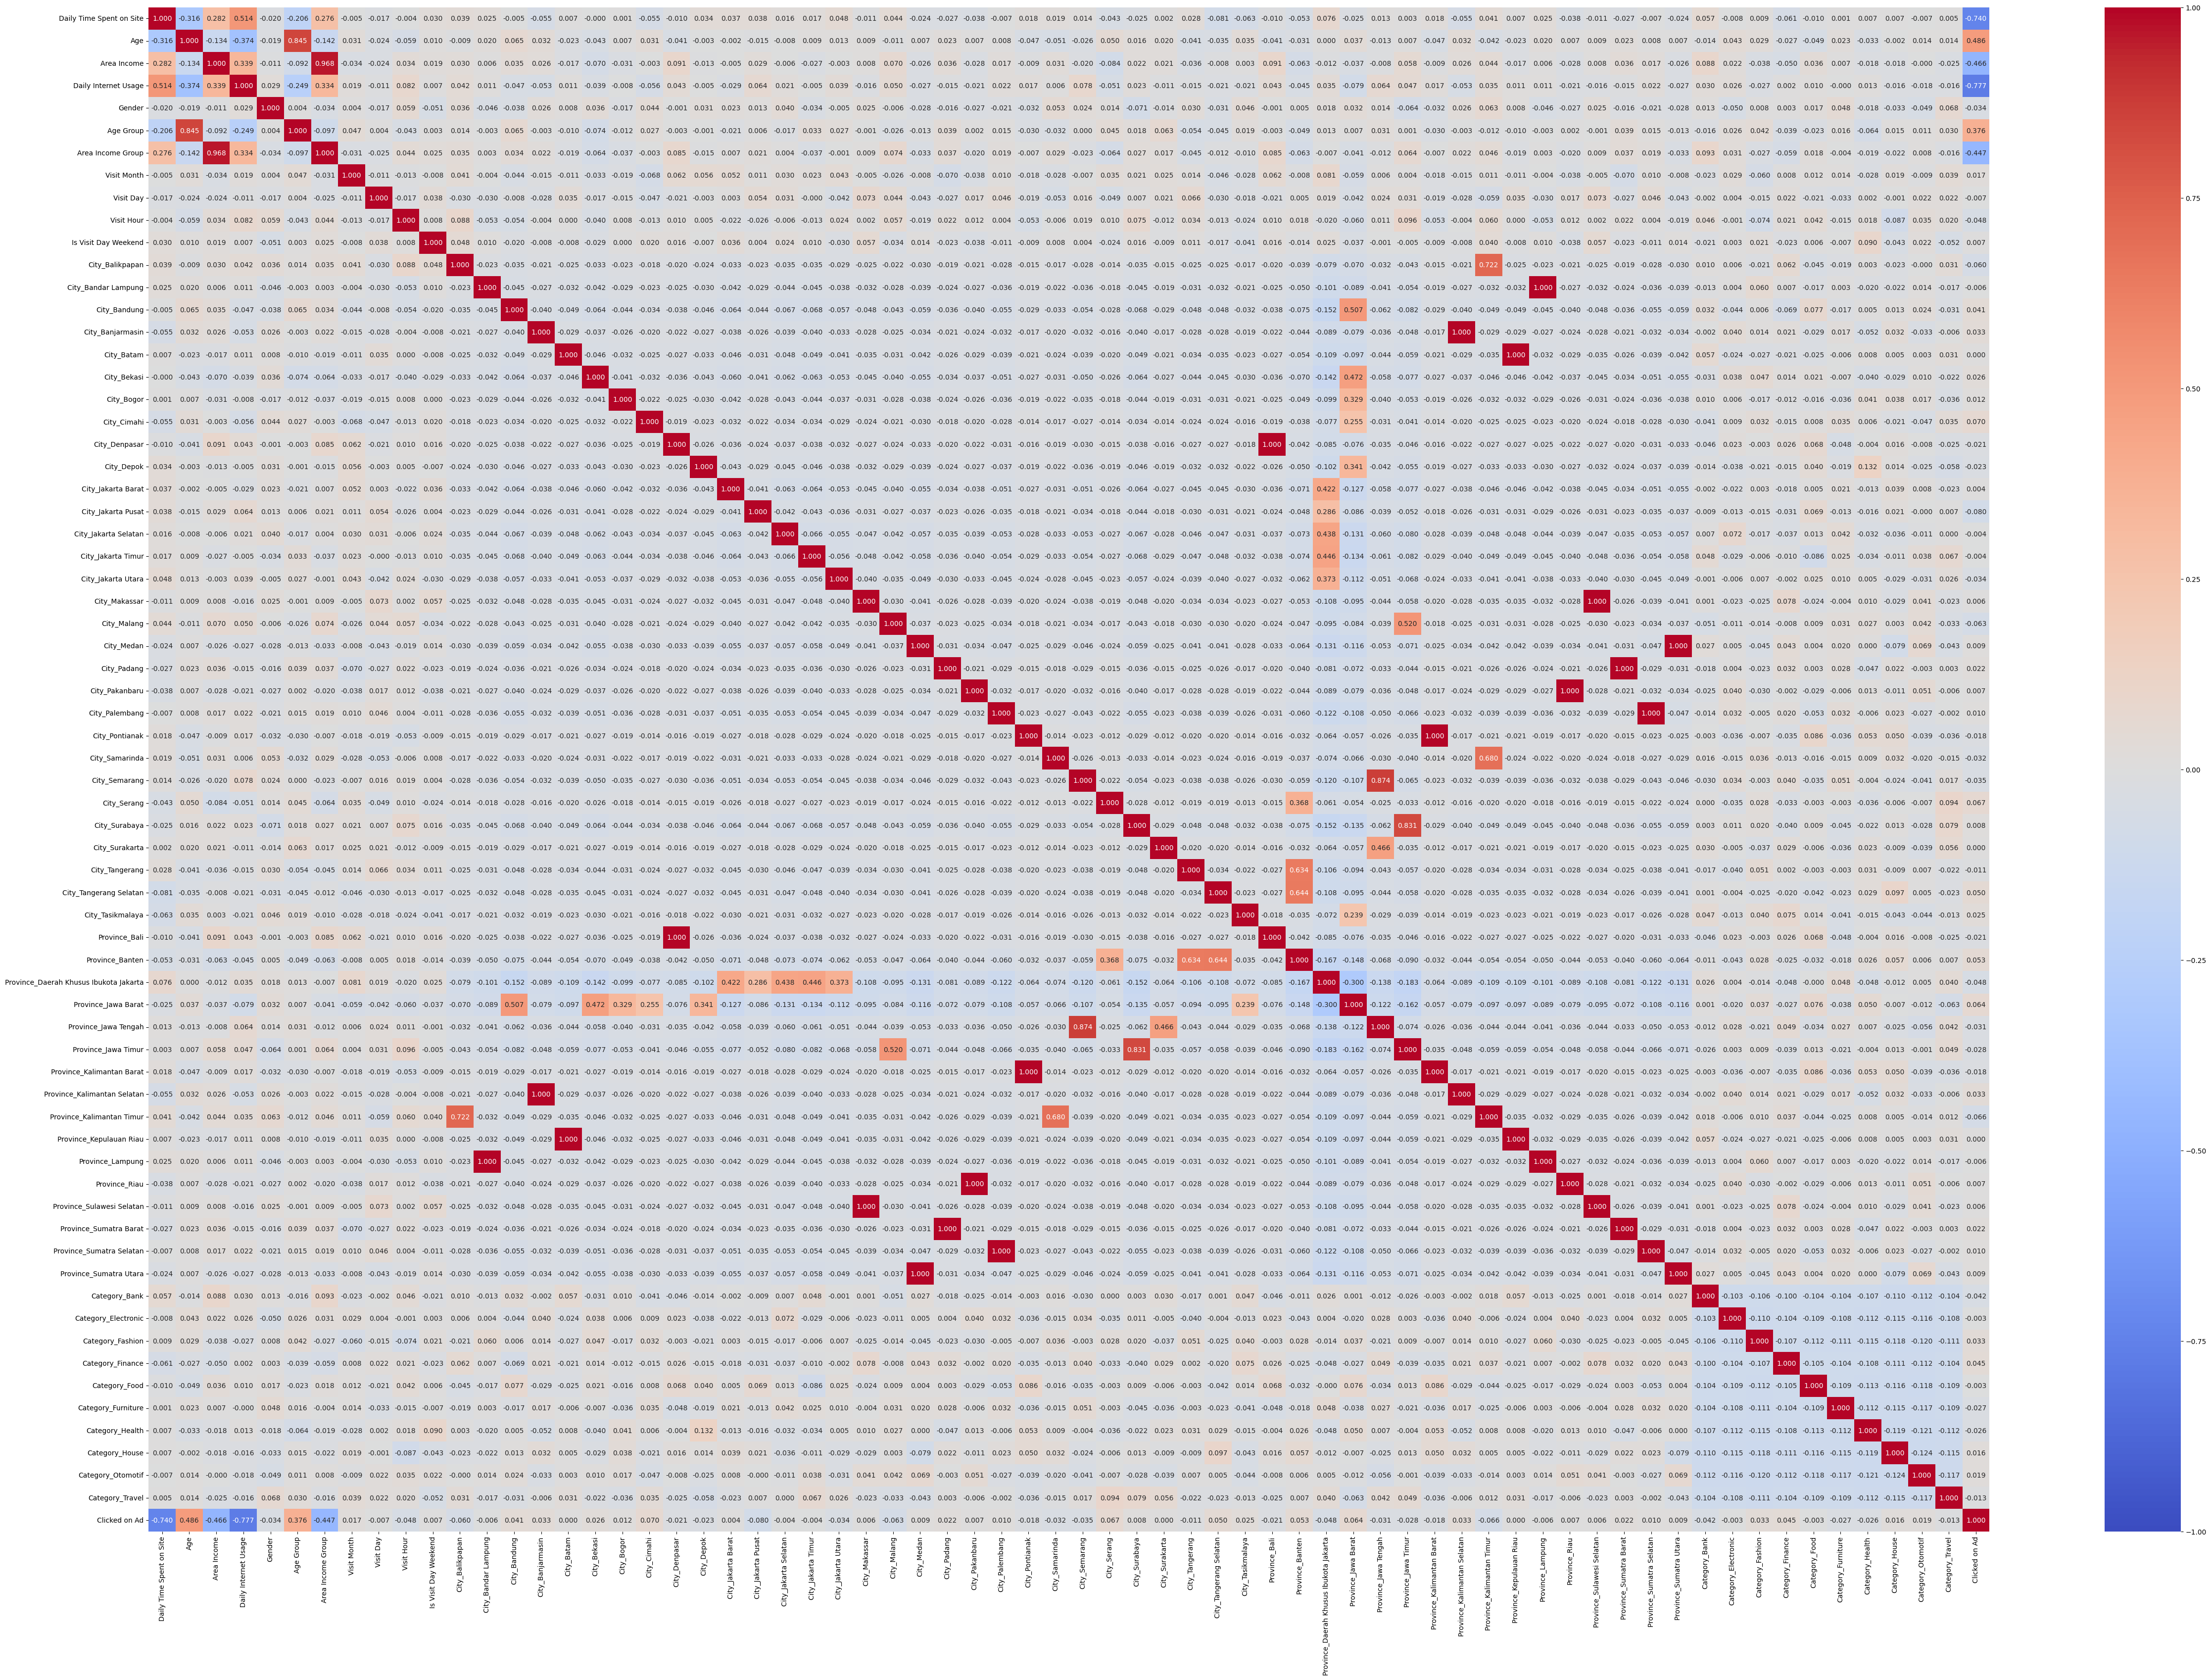

In [165]:
# Heatmap (Spearman corr)
plt.figure(figsize=(60, 40))
sns.heatmap(data = df_preprocessed.corr(method='spearman', numeric_only=True), cmap='coolwarm', annot=True, fmt='.3f', vmin=-1, vmax=1)
plt.show()

In [186]:
# Feature-Feature correlation representation in tabular form 
corr_feature = df_preprocessed.corr(method='spearman')

# Flatten the correlation matrix
flat_cm = corr_feature.stack().reset_index()
flat_cm.columns = ['A', 'B', 'Corr Value']

flat_cm = flat_cm.loc[flat_cm['Corr Value'] < 1, :]
flat_cm = flat_cm[(flat_cm['A'] != 'Clicked on Ad') & (flat_cm['B'] != 'Clicked on Ad')]

flat_cm['Corr Type'] = flat_cm['Corr Value'].apply(lambda x: 'Positive' if x >= 0 else 'Negative')
flat_cm['Corr Value'] = flat_cm['Corr Value'].apply(lambda x : abs(x))
flat_cm = flat_cm.sort_values(by='Corr Value', ascending=False, ignore_index=True)

redundant_cm = flat_cm[flat_cm['Corr Value'] >= 0.5]
redundant_cm = redundant_cm.drop_duplicates(subset=['Corr Value', 'Corr Type']).reset_index(drop=True)

pd.set_option('display.max_rows', None)
display(redundant_cm)
pd.reset_option('display.max_rows')


A                          B  Corr Value Corr Type
0                 Area Income          Area Income Group    0.968210  Positive
1        Province_Jawa Tengah              City_Semarang    0.874017  Positive
2                   Age Group                        Age    0.845377  Positive
3         Province_Jawa Timur              City_Surabaya    0.831479  Positive
4             City_Balikpapan  Province_Kalimantan Timur    0.721655  Positive
5   Province_Kalimantan Timur             City_Samarinda    0.679691  Positive
6      City_Tangerang Selatan            Province_Banten    0.644129  Positive
7             Province_Banten             City_Tangerang    0.633967  Positive
8         Province_Jawa Timur                City_Malang    0.519525  Positive
9        Daily Internet Usage   Daily Time Spent on Site    0.514424  Positive
10        Province_Jawa Barat               City_Bandung    0.507173  Positive

In [185]:
# Feature-Target correlation representation in tabular form 
corr_target = df_preprocessed.corrwith(df_preprocessed['Clicked on Ad'], method='spearman', numeric_only=True)
corr = corr_target.reset_index(name='Corr Value')
corr = corr[corr['index'] != "Clicked on Ad"]
corr = corr.rename(columns={'index' : 'Feature'})

corr['Corr Type'] = corr['Corr Value'].apply(lambda x : 'Positive' if x >= 0 else 'Negative')
corr['Corr Value'] = corr['Corr Value'].apply(lambda x : abs(x))
corr = corr.sort_values('Corr Value', ascending=False, ignore_index=True)
corr = corr[corr['Corr Value'] >= 0.35]
corr

Feature  Corr Value Corr Type
0      Daily Internet Usage    0.777141  Negative
1  Daily Time Spent on Site    0.739857  Negative
2                       Age    0.486337  Positive
3               Area Income    0.466317  Negative
4         Area Income Group    0.447113  Negative
5                 Age Group    0.376201  Positive

Text(0.5, 1.0, 'Kendall Correlation')

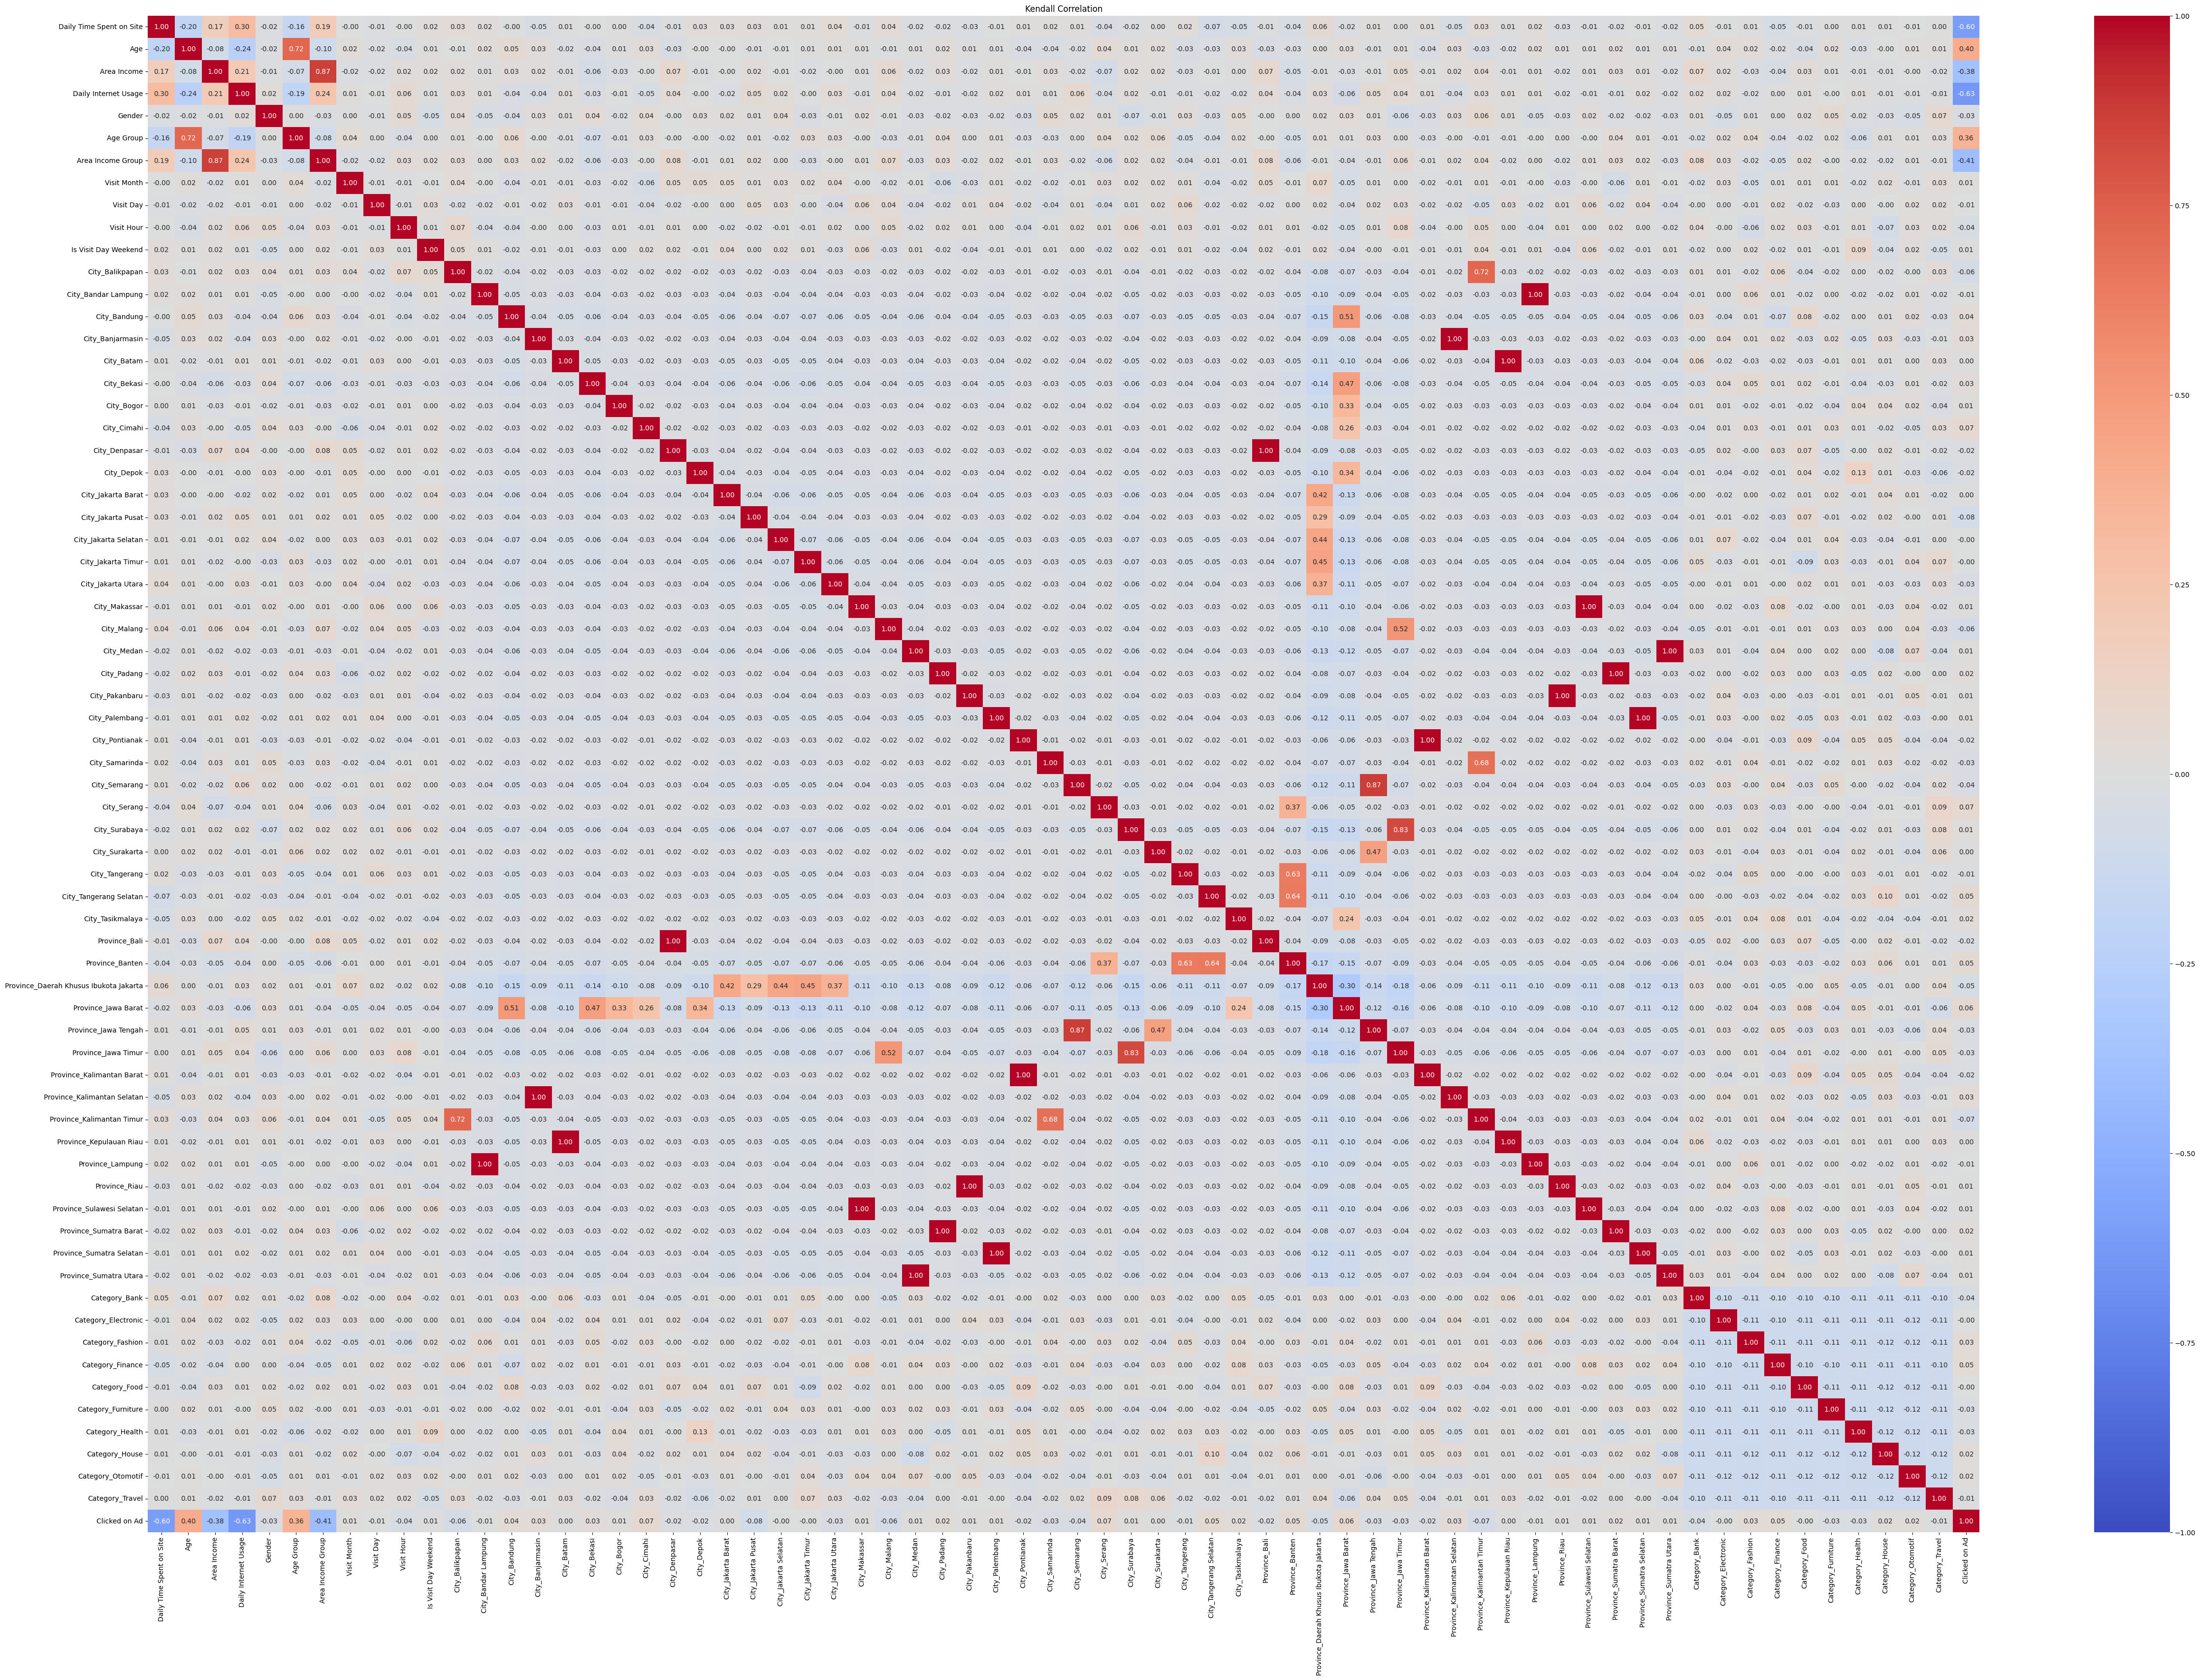

In [50]:
# Heatmap of numerical values (Kendall method)
plt.figure(figsize=(60, 40))
sns.heatmap(data=df_preprocessed.corr(method='kendall', numeric_only=True), cmap='coolwarm', annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.title('Kendall Correlation')

### SelectKBest Feature Importance (Statistical Test)

#### Additional Information Regarding Feature Relevance Calculation Method using SelectKBest

`sklearn.feature_selection.f_classif`, `sklearn.feature_selection.mutual_info_classif`, and `sklearn.feature_selection.chi2` are three different feature selection methods in scikit-learn, and each of them uses a different statistical test or measure to evaluate the importance of features in a classification task.

1. **`sklearn.feature_selection.f_classif`:**

   - **Type of Test:** Analysis of variance (ANOVA) F-statistic.
   - **Nature:** Assesses the linear dependency between each feature and the target variable.
   - **Assumption:** Assumes that the features are normally distributed and that the variance of the feature values is roughly equal across different classes.
   - **Usage:** Suitable for identifying features with significant differences in means among different classes.

   ```python
   from sklearn.feature_selection import f_classif
   ```

2. **`sklearn.feature_selection.mutual_info_classif`:**

   - **Type of Measure:** Mutual information, a non-parametric measure of the dependency between variables.
   - **Nature:** Captures any kind of statistical dependency, whether it is linear or non-linear.
   - **Assumption:** Has fewer assumptions compared to `f_classif` and is more robust when the relationship between features and the target variable is not strictly linear.
   - **Usage:** Suitable for identifying features with any type of relationship with the target variable.

   ```python
   from sklearn.feature_selection import mutual_info_classif
   ```

3. **`sklearn.feature_selection.chi2`:**

   - **Type of Test:** Chi-squared (χ²) statistical test.
   - **Nature:** Assesses the independence between each feature and the target variable.
   - **Assumption:** Assumes that the features and target variable are categorical.
   - **Usage:** Suitable for identifying features that are independent of the target variable in a categorical setting.

   ```python
   from sklearn.feature_selection import chi2
   ```

**Summary:**
- `f_classif` is based on the F-statistic and assumes a linear relationship between features and the target variable.
- `mutual_info_classif` is based on mutual information and is non-parametric, capturing any kind of statistical dependency.
- `chi2` uses the chi-squared test and is suitable for categorical data, assessing the independence between features and the target variable.

The choice between these methods depends on the nature of your data, the type of variables you have, and the assumptions you are willing to make about the relationships between features and the target variable. If your data is categorical, `chi2` might be more appropriate, while `f_classif` and `mutual_info_classif` are suitable for continuous or ordinal data.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Additional Information Regarding Scipy Statistical Tests

In `scipy`, you can determine feature importance using statistical tests that compute p-values. Here are some commonly used methods along with the corresponding functions in `scipy.stats`:

1. **T-test**: Determines if there is a significant difference between the means of two groups.
   - Function: `scipy.stats.ttest_ind()`

2. **ANOVA (Analysis of Variance)**: Determines if there are statistically significant differences between the means of three or more independent groups.
   - Function: `scipy.stats.f_oneway()`

3. **Chi-square test**: Tests the independence between two categorical variables.
   - Function: `scipy.stats.chi2_contingency()`

4. **Correlation test (Pearson, Spearman, etc.)**: Measures the strength and direction of association between two continuous variables.
   - Functions:
     - Pearson correlation: `scipy.stats.pearsonr()`
     - Spearman correlation: `scipy.stats.spearmanr()`
     - Kendall correlation: `scipy.stats.kendalltau()`

5. **Mutual information**: Measures the dependency between two variables by computing the reduction in uncertainty of one variable given the other.
   - Function: `sklearn.feature_selection.mutual_info_regression()` for regression problems and `sklearn.feature_selection.mutual_info_classif()` for classification problems.

6. **ANOVA F-value for feature selection**: Computes the ANOVA F-value for the provided sample and target variable.
   - Function: `sklearn.feature_selection.f_classif()` for classification problems and `sklearn.feature_selection.f_regression()` for regression problems.

Each of these methods provides a p-value, which indicates the significance of the relationship between the feature and the target variable. Lower p-values typically suggest stronger evidence against the null hypothesis, indicating a more significant feature.

Choose the appropriate method based on the nature of your data and the assumptions of the statistical test.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [51]:
# Create temporary dataframe for testing SelectKBest
df_feature_target_relation = df_preprocessed.copy()
df_feature_target_relation.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Gender  \
0                     68.95   35  432837300.0                256.09       0   
1                     80.23   31  479092950.0                193.77       1   
2                     69.47   26  418501580.0                236.50       0   
3                     74.15   29  383643260.0                245.89       1   
4                     68.37   35  517229930.0                225.58       0   

   Age Group  Area Income Group  Visit Month  Visit Day  Visit Hour  \
0          1                  2            3         27           0   
1          1                  3            4          4           1   
2          0                  2            3         13          20   
3          0                  1            1         10           2   
4          1                  3            6          3           3   

   Is Visit Day Weekend  City_Balikpapan  City_Bandar Lampung  City_Bandung  \
0                     1                0                    0             0   
1                     0                0                    0             0   
2                     1                0                    0             0   
3                     1                0                    0             0   
4                     0                0                    0             0   

   City_Banjarmasin  City_Batam  City_Bekasi  City_Bogor  City_Cimahi  \
0                 0           0            0           0            0   
1                 0           0            0           0            0   
2                 0           0            0           0            0   
3                 0           1            0           0            0   
4                 0           0            0           0            0   

   City_Denpasar  City_Depok  City_Jakarta Barat  City_Jakarta Pusat  \
0              0           0                   0                   0   
1              1           0                   0                   0   
2              0           0                   0                   0   
3              0           0                   0                   0   
4              0           0                   0                   0   

   City_Jakarta Selatan  City_Jakarta Timur  City_Jakarta Utara  \
0                     0                   1                   0   
1                     0                   0                   0   
2                     0                   0                   0   
3                     0                   0                   0   
4                     0                   0                   0   

   City_Makassar  City_Malang  City_Medan  City_Padang  City_Pakanbaru  \
0              0            0           0            0               0   
1              0            0           0            0               0   
2              0            0           0            0               0   
3              0            0           0            0               0   
4              0            0           1            0               0   

   City_Palembang  City_Pontianak  City_Samarinda  City_Semarang  City_Serang  \
0               0               0               0              0            0   
1               0               0               0              0            0   
2               0               0               0              0            0   
3               0               0               0              0            0   
4               0               0               0              0            0   

   City_Surabaya  City_Surakarta  City_Tangerang  City_Tangerang Selatan  \
0              0               0               0                       0   
1              0               0               0                       0   
2              1               0               0                       0   
3              0               0               0                       0   
4              0               0       

In [52]:
# Calculation of feature importance score to target (numerical/categorical feature - categorical target)
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Separate features and target variable
x_features_test = df_feature_target_relation.drop(columns=['Clicked on Ad'])  # Features
y_target_test = df_feature_target_relation['Clicked on Ad']  # Target variable

# Instantiate SelectKBest
k_best = SelectKBest(score_func=mutual_info_classif, k='all')  # Use 'all' to see scores for all features

# Fit and transform the data
x_selected_features = k_best.fit_transform(x_features_test, y_target_test)

# Get scores, p-values, and feature names
feature_scores = k_best.scores_
feature_pvalues = k_best.pvalues_ #for mutual_info_classif this will display None but not for other method
feature_names = x_features_test.columns

# Create a DataFrame to display feature scores and p-values
feature_scores_df = pd.DataFrame({'Feature': feature_names, 'Score': feature_scores, 'P_Values' : feature_pvalues})
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)

# Display the feature scores and p-values
pd.set_option('display.max_rows', None)  # Set max_rows to None for unlimited rows
display(feature_scores_df)

pd.reset_option('display.max_rows')

Feature     Score P_Values
3                     Daily Internet Usage  0.412303     None
0                 Daily Time Spent on Site  0.365775     None
1                                      Age  0.138019     None
2                              Area Income  0.126310     None
6                        Area Income Group  0.118540     None
5                                Age Group  0.077773     None
31                          City_Palembang  0.057399     None
42                         Province_Banten  0.031110     None
17                              City_Bogor  0.027432     None
62                      Category_Furniture  0.026518     None
35                             City_Serang  0.024936     None
38                          City_Tangerang  0.024659     None
46                     Province_Jawa Timur  0.024521     None
48             Province_Kalimantan Selatan  0.020203     None
43  Province_Daerah Khusus Ibukota Jakarta  0.019472     None
22                      City_Jakarta Pusat  0.019095     None
47               Province_Kalimantan Barat  0.017758     None
16                             City_Bekasi  0.017107     None
60                        Category_Finance  0.011730     None
20                              City_Depok  0.011488     None
59                        Category_Fashion  0.011372     None
25                      City_Jakarta Utara  0.011259     None
30                          City_Pakanbaru  0.010061     None
65                       Category_Otomotif  0.009754     None
39                  City_Tangerang Selatan  0.008828     None
63                         Category_Health  0.008558     None
52                           Province_Riau  0.007128     None
40                        City_Tasikmalaya  0.006661     None
49               Province_Kalimantan Timur  0.006656     None
7                              Visit Month  0.005046     None
57                           Category_Bank  0.004190     None
14                        City_Banjarmasin  0.003469     None
8                                Visit Day  0.003432     None
45                    Province_Jawa Tengah  0.002531     None
9                               Visit Hour  0.001452     None
54                  Province_Sumatra Barat  0.000497     None
33                          City_Samarinda  0.000455     None
37                          City_Surakarta  0.000000     None
36                           City_Surabaya  0.000000     None
4                                   Gender  0.000000     None
64                          Category_House  0.000000     None
10                    Is Visit Day Weekend  0.000000     None
11                         City_Balikpapan  0.000000     None
61                           Category_Food  0.000000     None
12                     City_Bandar Lampung  0.000000     None
13                            City_Bandung  0.000000     None
58                     Category_Electronic  0.000000     None
15                              City_Batam  0.000000     None
56                  Province_Sumatra Utara  0.000000     None
55                Province_Sumatra Selatan  0.000000     None
18                             City_Cimahi  0.000000     None
53               Province_Sulawesi Selatan  0.000000     None
19                           City_Denpasar  0.000000     None
51                        Province_Lampung  0.000000     None
50                 Province_Kepulauan Riau  0.000000     None
21                      City_Jakarta Barat  0.000000     None
23                    City_Jakarta Selatan  0.000000     None
24                      City_Jakarta Timur  0.000000     None
26                           City_Makassar  0.000000     None
27                             City_Malang  0.000000     None
44                     Province_Jawa Barat  0.000000     None
28                              City_Medan  0.000000     None
29                             City_Padang  0.000000     None
41                           Province_Bali  0.000000     None
32   

In [53]:
#Calculation of feature importance score to target (categorical feature - categorical target)
from sklearn.feature_selection import SelectKBest, chi2

# Separate features and target variable
x_features_test = df_feature_target_relation.drop(columns=['Clicked on Ad'])  # Features
y_target_test = df_feature_target_relation['Clicked on Ad']  # Target variable

# Instantiate SelectKBest
k_best = SelectKBest(score_func=chi2, k='all')  # Use 'all' to see scores for all features

# Fit and transform the data
x_selected_features = k_best.fit_transform(x_features_test, y_target_test)

# Get scores, p-values, and feature names
feature_scores = k_best.scores_
feature_pvalues = k_best.pvalues_ #for mutual_info_classif this will display None but not for other method
feature_names = x_features_test.columns

# Create a DataFrame to display feature scores and p-values
feature_scores_df = pd.DataFrame({'Feature': feature_names, 'Score': feature_scores, 'P_Values' : feature_pvalues})
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)

# Display the feature scores and p-values
pd.set_option('display.max_rows', None)  # Set max_rows to None for unlimited rows
display(feature_scores_df)

pd.reset_option('display.max_rows')

Feature         Score       P_Values
2                              Area Income  5.111975e+09   0.000000e+00
3                     Daily Internet Usage  6.520193e+03   0.000000e+00
0                 Daily Time Spent on Site  2.096966e+03   0.000000e+00
1                                      Age  5.194708e+02  5.516589e-115
6                        Area Income Group  1.667790e+02   3.738613e-38
5                                Age Group  5.739614e+01   3.563067e-14
9                               Visit Hour  9.339623e+00   2.242517e-03
22                      City_Jakarta Pusat  6.259259e+00   1.235459e-02
18                             City_Cimahi  4.764706e+00   2.904902e-02
35                             City_Serang  4.454545e+00   3.480848e-02
49               Province_Kalimantan Timur  4.235294e+00   3.959176e-02
27                             City_Malang  3.846154e+00   4.986020e-02
11                         City_Balikpapan  3.555556e+00   5.934644e-02
44                     Province_Jawa Barat  3.219048e+00   7.278597e-02
42                         Province_Banten  2.578947e+00   1.082937e-01
39                  City_Tangerang Selatan  2.454545e+00   1.171851e-01
60                        Category_Finance  1.857143e+00   1.729549e-01
43  Province_Daerah Khusus Ibukota Jakarta  1.743083e+00   1.867487e-01
57                           Category_Bank  1.600000e+00   2.059032e-01
13                            City_Bandung  1.562500e+00   2.112995e-01
34                           City_Semarang  1.195122e+00   2.742988e-01
25                      City_Jakarta Utara  1.088889e+00   2.967175e-01
14                        City_Banjarmasin  1.086957e+00   2.971465e-01
48             Province_Kalimantan Selatan  1.086957e+00   2.971465e-01
33                          City_Samarinda  1.000000e+00   3.173105e-01
59                        Category_Fashion  9.803922e-01   3.221020e-01
45                    Province_Jawa Tengah  9.245283e-01   3.362888e-01
46                     Province_Jawa Timur  7.111111e-01   3.990752e-01
62                      Category_Furniture  6.530612e-01   4.190203e-01
16                             City_Bekasi  6.428571e-01   4.226781e-01
63                         Category_Health  6.153846e-01   4.327676e-01
4                                   Gender  6.033403e-01   4.373064e-01
40                        City_Tasikmalaya  6.000000e-01   4.385780e-01
20                              City_Depok  5.333333e-01   4.652088e-01
29                             City_Padang  4.736842e-01   4.912971e-01
54                  Province_Sumatra Barat  4.736842e-01   4.912971e-01
19                           City_Denpasar  4.285714e-01   5.126908e-01
41                           Province_Bali  4.285714e-01   5.126908e-01
32                          City_Pontianak  3.333333e-01   5.637029e-01
47               Province_Kalimantan Barat  3.333333e-01   5.637029e-01
65                       Category_Otomotif  3.214286e-01   5.707504e-01
7                              Visit Month  2.517684e-01   6.158326e-01
64                          Category_House  2.293578e-01   6.320004e-01
66                         Category_Travel  1.632653e-01   6.861678e-01
17                              City_Bogor  1.428571e-01   7.054570e-01
8                                Visit Day  1.366572e-01   7.116271e-01
38                          City_Tangerang  1.250000e-01   7.236736e-01
55                Province_Sumatra Selatan  9.523810e-02   7.576207e-01
31                          City_Palembang  9.523810e-02   7.576207e-01
28                              City_Medan  8.333333e-02   7.728300e-01
56                  Province_Sumatra Utara  8.333333e-02   7.728300e-01
36                           City_Surabaya  6.250000e-02   8.025873e-01
30                          City_Pakanbaru  4.347826e-02   8.348273e-01
52                           Province_Riau  4.347826e-02   8.348273e-01
12                     City_Bandar Lampung  3.448276e-02   8.526837e-01
51 

- Reviewing the statistical test values of several features generated, I've decided not to use some engineered features in training the model due to multicollinearity issues with the original features. Therefore, these engineered features will only be used for analysis purposes.

- Meanwhile, some one-hot encoded features like city and province have many features with very low importance to the target, so those features will not be used.

- **Most of the features that will be used are from original features**

In [54]:
df_preprocessed.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Gender', 'Age Group', 'Area Income Group',
       'Visit Month', 'Visit Day', 'Visit Hour', 'Is Visit Day Weekend',
       'City_Balikpapan', 'City_Bandar Lampung', 'City_Bandung',
       'City_Banjarmasin', 'City_Batam', 'City_Bekasi', 'City_Bogor',
       'City_Cimahi', 'City_Denpasar', 'City_Depok', 'City_Jakarta Barat',
       'City_Jakarta Pusat', 'City_Jakarta Selatan', 'City_Jakarta Timur',
       'City_Jakarta Utara', 'City_Makassar', 'City_Malang', 'City_Medan',
       'City_Padang', 'City_Pakanbaru', 'City_Palembang', 'City_Pontianak',
       'City_Samarinda', 'City_Semarang', 'City_Serang', 'City_Surabaya',
       'City_Surakarta', 'City_Tangerang', 'City_Tangerang Selatan',
       'City_Tasikmalaya', 'Province_Bali', 'Province_Banten',
       'Province_Daerah Khusus Ibukota Jakarta', 'Province_Jawa Barat',
       'Province_Jawa Tengah', 'Province_Jawa Timur',
       'Province_Kalimantan

In [55]:
# Select only relevant features for each cases before moving to modelling process
df_model = df_preprocessed.copy()

# Important features only based on correlation and K-best parameter (correlation > 0.7 will be dropped)
selected_features = ['Daily Time Spent on Site', 'Age', 'Area Income',
                    'Daily Internet Usage', 'Gender', 'Clicked on Ad']

df_model = df_model[selected_features]

## Split Train and Test Data

In [56]:
# Split Train and Test Data
x = df_model.drop(columns=['Clicked on Ad'])
y = df_model['Clicked on Ad']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#Check dimension of train and test data
print(f'Dimension of x_train data : {x_train.shape}')
print(f'Dimension of y_train data : {y_train.shape}')
print(f'Dimension of x_test data : {x_test.shape}')
print(f'Dimension of y_test data : {y_test.shape}')

Dimension of x_train data : (700, 5)
Dimension of y_train data : (700,)
Dimension of x_test data : (300, 5)
Dimension of y_test data : (300,)


In [57]:
# Check distribution of target after splitting
display(y_train.value_counts())

display(y_test.value_counts())

Clicked on Ad
0    354
1    346
Name: count, dtype: int64

Clicked on Ad
1    154
0    146
Name: count, dtype: int64

## Feature Scalling

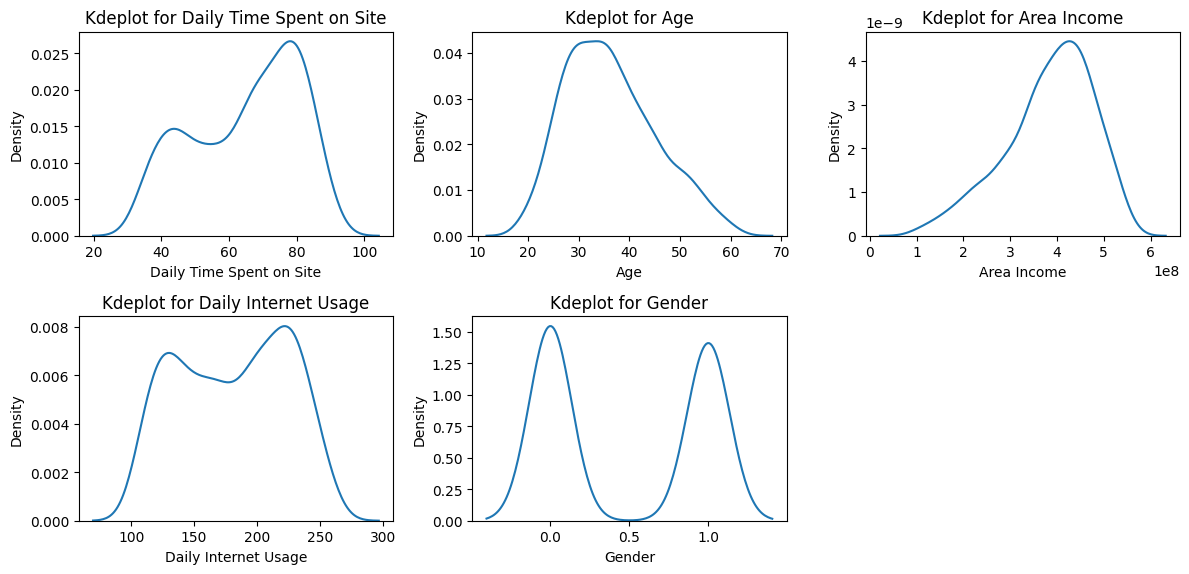

In [58]:
# Checking distribution before scaling
fig, ax  = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
ax = ax.flatten()

for i, col in enumerate(x_train.columns) :
    sns.kdeplot(data=x_train, x=col, ax=ax[i])
    ax[i].set_title(f'Kdeplot for {col}')

# Remove the sixth subplot
# del ax[5]
ax[5].axis('off')

plt.tight_layout()
plt.show()

The overall feature distribution is near normal distribution, but the problem lies in the values range. The proper method of scalling for this case is standardization.

**Reminder About Choosing Scaling Methods**

If the issue is primarily with the range of values rather than the shape of the distributions, you can use scaling methods to bring all features to a similar scale without altering their distributions. Here are some common scaling methods you can consider:

1. **Min-Max Scaling (Normalization)**:
   - Scales the data to a fixed range, usually between 0 and 1.
   - Formula: \( X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}} \)
   - Use when you know the minimum and maximum values for your features or when you want to bound the data within a specific range.

2. **Standard Scaling (Standardization)**:
   - Scales the data so that it has a mean of 0 and a standard deviation of 1.
   - Formula: \( X_{\text{scaled}} = \frac{X - \mu}{\sigma} \)
   - Use when the features are normally distributed or when you're using models that assume zero-centered data.

3. **Robust Scaling**:
   - Scales the data similarly to standard scaling but uses the median and the interquartile range (IQR) instead of the mean and standard deviation.
   - Formula: \( X_{\text{scaled}} = \frac{X - \text{median}(X)}{\text{IQR}(X)} \)
   - Use when the data contains outliers or when the distribution is not normal.

4. **Max Abs Scaler**:
   - Scales each feature to its maximum absolute value.
   - Formula: \( X_{\text{scaled}} = \frac{X}{\max(|X|)} \)
   - Use when the features are sparse or when you want to preserve sparsity.

5. **Power Transformer (Yeo-Johnson or Box-Cox)**:
   - Applies a power transformation to make the data more Gaussian-like.
   - Use when the data is skewed or when you need to stabilize variance.

For your case where the overall feature distributions are near normal but the ranges vary significantly, Min-Max Scaling or Standard Scaling might be appropriate. If you're concerned about outliers, Robust Scaling could be a better choice. It's often a good idea to try different scaling methods and see which one works best for your specific dataset and model.

In [59]:
# Scaling with standardization method
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

columns_to_scale = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'] #Choose columns for scaling based on the distribution above
x_train[columns_to_scale] = ss.fit_transform(x_train[columns_to_scale])
x_test[columns_to_scale] = ss.transform(x_test[columns_to_scale])

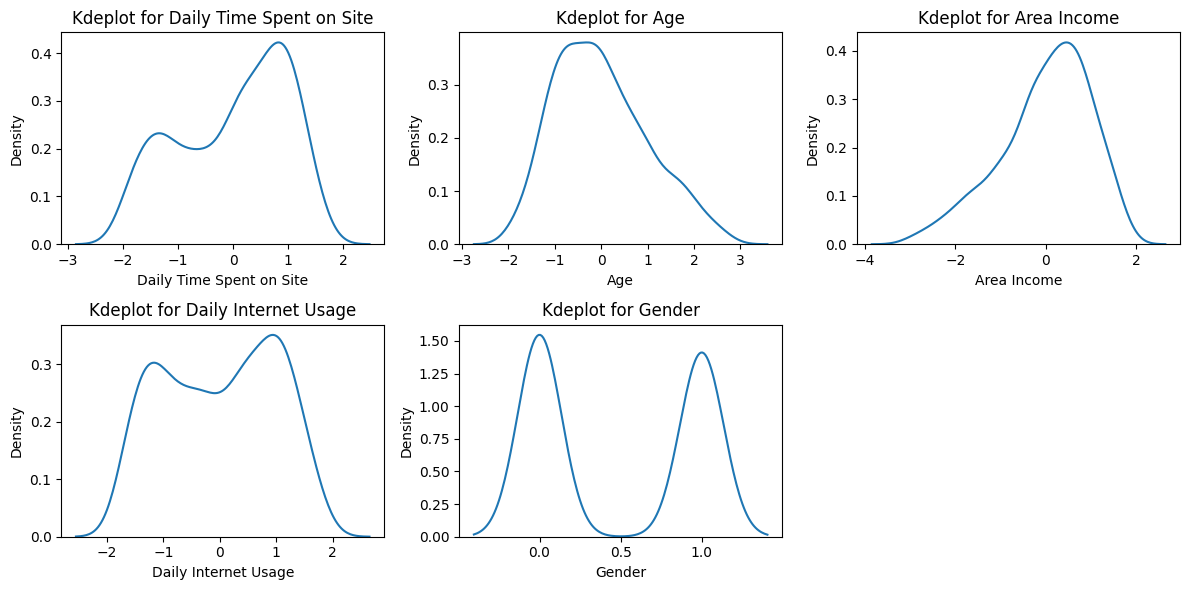

In [60]:
# Checking distribution after scaling
fig, ax  = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))
ax = ax.flatten()

for i, col in enumerate(x_train.columns) :
    sns.kdeplot(data=x_train, x=col, ax=ax[i])
    ax[i].set_title(f'Kdeplot for {col}')

# Remove the sixth subplot
# del ax[5]
ax[5].axis('off')

plt.tight_layout()
plt.show()

# **STAGE 3 : MODELLING AND EVALUATION**

## Train Classification Models

Initial train using default hyperparameters.

In [61]:
# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

# Initiatialize object for each model
lg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
ab = AdaBoostClassifier()
xg = XGBClassifier()

models = [lg, knn, dt, rf, ab, xg]

for model in models :
    model.fit(x_train, y_train)

## Evaluate Classification Models

In [68]:
# Import metrics score that will be evalueated
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_proba_test = model.predict_proba(x_test)
    y_pred_proba_train = model.predict_proba(x_train)

    # Print evaluation scores
    print(f"Accuracy Score (Test Set): {accuracy_score(y_pred, y_test):.2f}")
    print(f"Precision Score (Test Set): {precision_score(y_pred, y_test):.2f}")
    print(f"Recall Score (Test Set): {recall_score(y_pred, y_test):.2f}")
    print(f"F1 Score (Test Set): {f1_score(y_pred, y_test):.2f}")
    print(f"ROC-AUC (Train-Proba): {roc_auc_score(y_train, y_pred_proba_train[:, 1])}")
    print(f"ROC-AUC (Test-Proba): {roc_auc_score(y_test, y_pred_proba_test[:, 1])}")

    # Cross Validation
    score = cross_validate(model, x_train, y_train, cv=5, scoring='accuracy', return_train_score=True) # Scoring change based on what metrics we want to validate (usually choose the main performance metric)
    print('Accuracy (Crossval Train): ' + str(score['train_score'].mean()))
    print('Accuracy (Crossval Test): ' + str(score['test_score'].mean()))

    # Print standard deviation of Accuracy scores
    print('Accuracy Std Dev (Crossval Train): ' + str(score['train_score'].std()))
    print('Accuracy Std Dev (Crossval Test): ' + str(score['test_score'].std()))

In [69]:
# Printing metrics score for all models to compare

# Logistic Regression
print('Evaluate LogisticRegression')
eval_classification(lg)

# K-Nearest Neighbors Classifier
print('\nEvaluate KNeighborsClassifier')
eval_classification(knn)

# Decision Tree Classifier
print('\nEvaluate DecisionTreeClassifier')
eval_classification(dt)

# Random Forest Classifier
print('\nEvaluate RandomForestClassifier')
eval_classification(rf)

# AdaBoost Classifier
print('\nEvaluate AdaBoostClassifier')
eval_classification(ab)

# XGBoost Classifier
print('\nEvaluate XGBoostClassifier')
eval_classification(xg)

Evaluate LogisticRegression
Accuracy Score (Test Set): 0.97
Precision Score (Test Set): 0.95
Recall Score (Test Set): 0.99
F1 Score (Test Set): 0.97
ROC-AUC (Train-Proba): 0.9924316645439404
ROC-AUC (Test-Proba): 0.9869685109411137
Accuracy (Crossval Train): 0.9682142857142857
Accuracy (Crossval Test): 0.9685714285714286
Accuracy Std Dev (Crossval Train): 0.00346262846958308
Accuracy Std Dev (Crossval Test): 0.013248026422136731

Evaluate KNeighborsClassifier
Accuracy Score (Test Set): 0.95
Precision Score (Test Set): 0.93
Recall Score (Test Set): 0.98
F1 Score (Test Set): 0.95
ROC-AUC (Train-Proba): 0.9977139871330133
ROC-AUC (Test-Proba): 0.9812978117772638
Accuracy (Crossval Train): 0.9692857142857143
Accuracy (Crossval Test): 0.9642857142857142
Accuracy Std Dev (Crossval Train): 0.004711037842240312
Accuracy Std Dev (Crossval Test): 0.027847983842311345

Evaluate DecisionTreeClassifier
Accuracy Score (Test Set): 0.94
Precision Score (Test Set): 0.94
Recall Score (Test Set): 0.94
F1

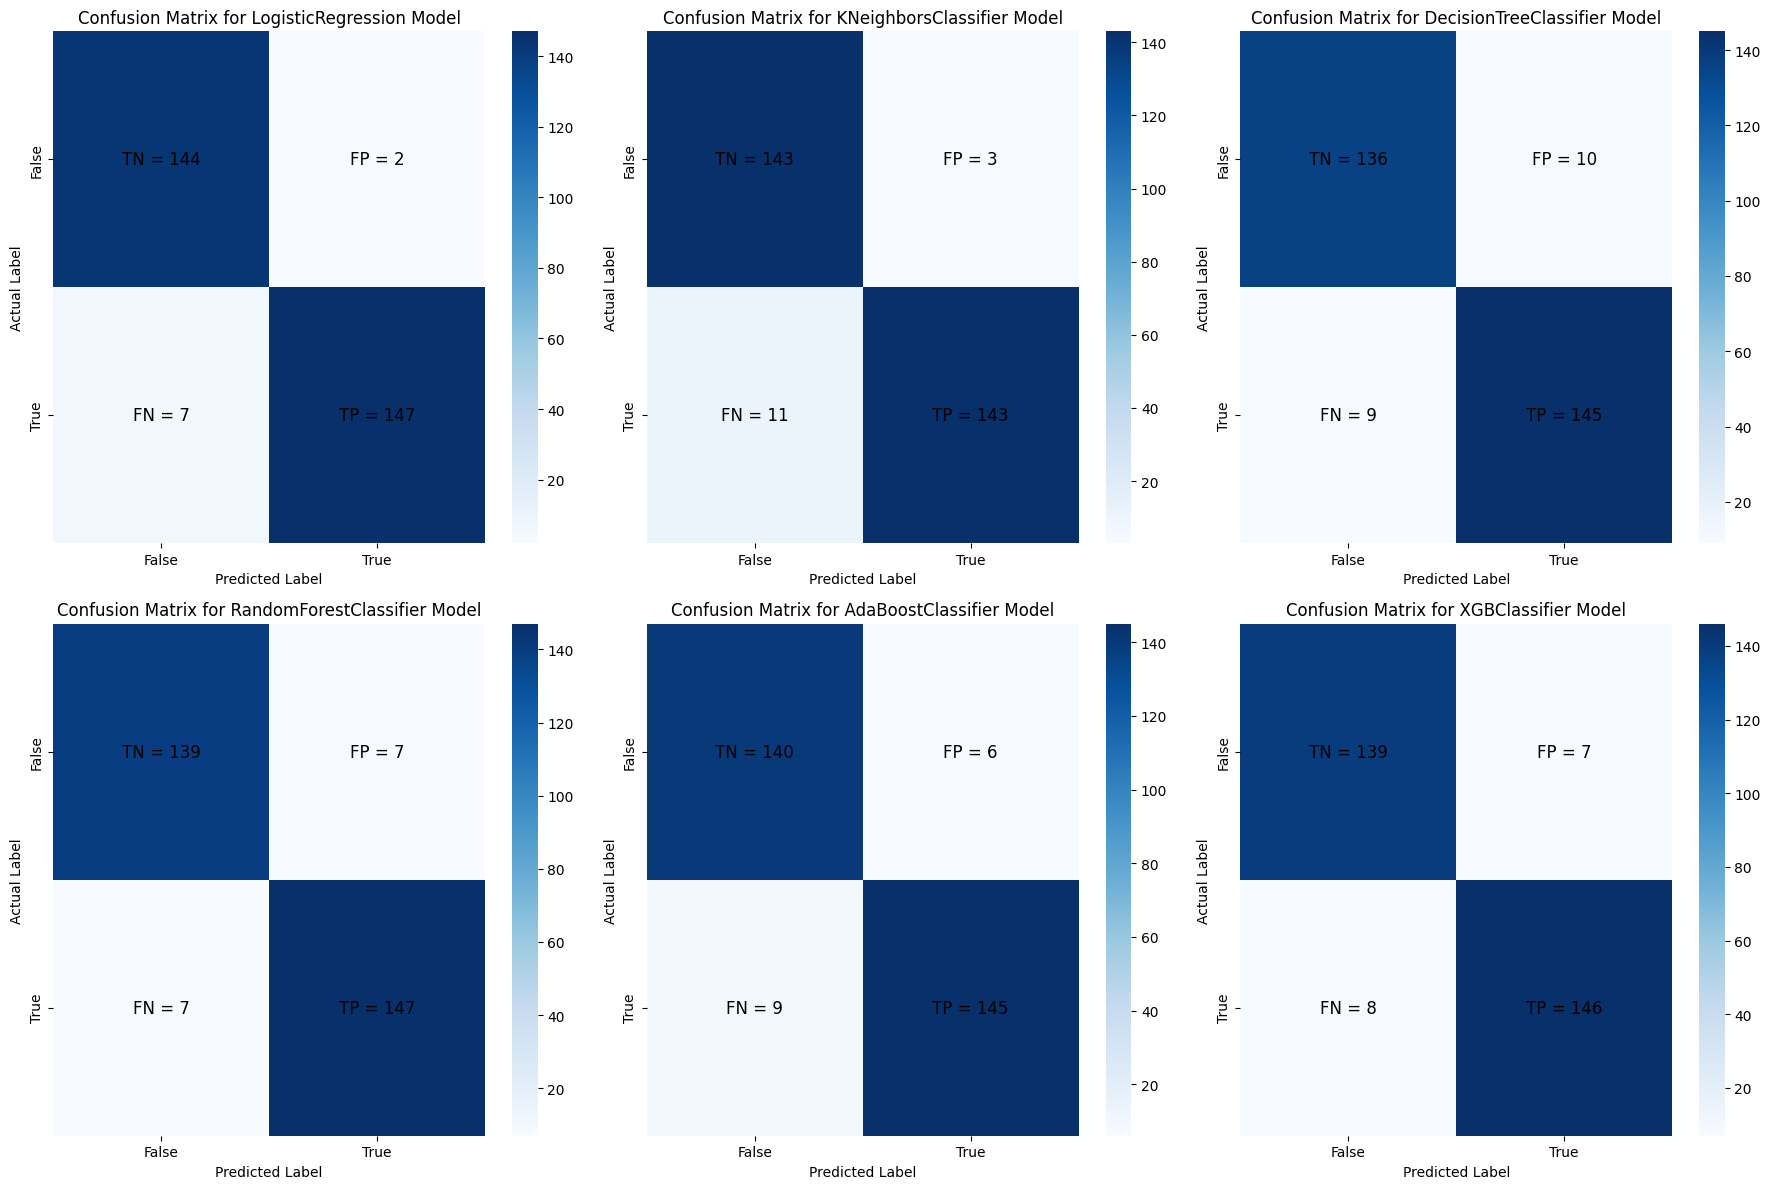

In [76]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

conf_mats = []

for i, model in enumerate(models):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    # Make confusion matrix
    conf_mat = confusion_matrix(y_test, y_pred)
    conf_mats.append(conf_mat)

    # Plot the confusion matrix in heatmap
    sns.heatmap(conf_mat, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'], ax=ax[i//3, i%3]) 

    # Add annotations for TN, FN, FP, TP
    for j in range(2):
        for k in range(2):
            if j == 0 and k == 0:
                text = f'TN = {conf_mat[j, k]}'
            elif j == 1 and k == 0:
                text = f'FN = {conf_mat[j, k]}'
            elif j == 0 and k == 1:
                text = f'FP = {conf_mat[j, k]}'
            elif j == 1 and k == 1:
                text = f'TP = {conf_mat[j, k]}'

            ax[i//3, i%3].text(k + 0.5, j + 0.5, text, ha='center', va='center', color='black', fontsize=12)

    ax[i//3, i%3].set_title(f'Confusion Matrix for {type(model).__name__} Model')
    ax[i//3, i%3].set_xlabel('Predicted Label')
    ax[i//3, i%3].set_ylabel('Actual Label') 

plt.tight_layout()
plt.show()

**Additional Information About confusion_matrix in sckit-learn**

Documentation : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

The `confusion_matrix` function from scikit-learn is used to compute the confusion matrix, which is a table that summarizes the performance of a classification algorithm. The confusion matrix is typically a 2x2 matrix for binary classification problems.

Here's the breakdown:

```python
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true labels and predicted labels, respectively
conf_mat = confusion_matrix(y_test, y_pred)
```

The confusion matrix `conf_mat` will be a 2x2 matrix in the form:

```
[[True Negative  False Positive]
 [False Negative True Positive]]
```

- True Negative (TN): The instances that are actually negative (class 0) and are predicted correctly as negative.
- False Positive (FP): The instances that are actually negative (class 0) but are predicted incorrectly as positive.
- False Negative (FN): The instances that are actually positive (class 1) but are predicted incorrectly as negative.
- True Positive (TP): The instances that are actually positive (class 1) and are predicted correctly as positive.

So, in the confusion matrix `conf_mat`, the elements are arranged as follows:

- `conf_mat[0, 0]`: True Negatives (TN)
- `conf_mat[0, 1]`: False Positives (FP)
- `conf_mat[1, 0]`: False Negatives (FN)
- `conf_mat[1, 1]`: True Positives (TP)

These values help evaluate the performance of your binary classification model. The diagonal elements (`conf_mat[0, 0]` and `conf_mat[1, 1]`) represent correct predictions, while the off-diagonal elements represent errors in predictions.

In [74]:
# Printing metrics in form of classification report
from sklearn.metrics import classification_report

def display_classification_reports(model_for_report):
    model_for_report.fit(x_train, y_train)
    y_pred = model_for_report.predict(x_test)
    print("Classification Report for", type(model_for_report).__name__)
    print(classification_report(y_test, y_pred))

# Evaluate and print classification reports for all models
for model in models:
    display_classification_reports(model)

Classification Report for LogisticRegression
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       146
           1       0.99      0.95      0.97       154

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300

Classification Report for KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       146
           1       0.98      0.93      0.95       154

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300

Classification Report for DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       146
           1       0.93      0.94      0.94       154

    accuracy                           0.

## Feature Importances from Classification Models

In [104]:
# Function for model feature importance score
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    # Add labels to the bars
    for i, v in enumerate(model.feature_importances_):
        ax.text(v, i, f'{v:.2f}', ha='left', va='center', color='black')  # Corrected line

    plt.xlabel('Score')
    plt.ylabel('Feature')
    plt.title('Feature importance score')
    plt.show()

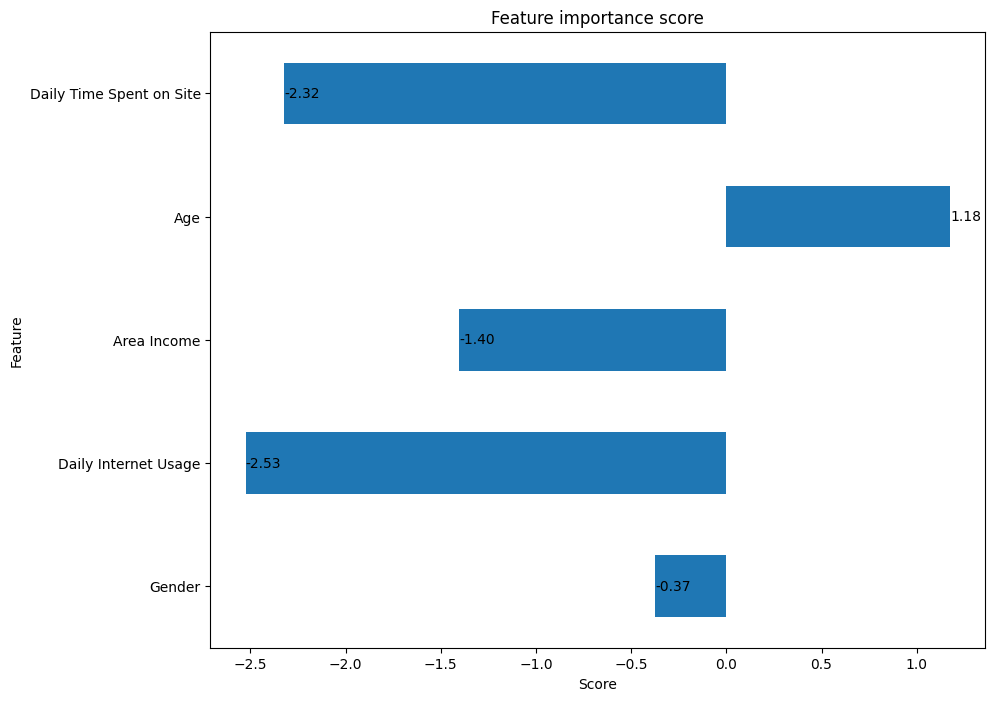

In [108]:
# Logistic regression feature importance
lg_features_importance = pd.DataFrame(lg.coef_.reshape(5), index=x_train.columns)

# Plot the horizontal bar plot
ax = lg_features_importance.plot(kind='barh', figsize=(10, 8), legend=False)

# Invert y-axis to display the most important features at the top
ax.invert_yaxis()

# Add labels to the bars
for i, v in enumerate(lg_features_importance.values):
    ax.text(v, i, f'{v[0]:.2f}', ha='left', va='center', color='black')

plt.xlabel('Score')
plt.ylabel('Feature')
plt.title('Feature importance score')
plt.show()

In the model generated using the logistic regression algorithm, the features contributing to the prediction results sorted from the most important are Daily Internet Usage, Daily Time Spent on Site, Area Income, Age, and lastly Gender.